# Stock Exchange for python programmers

# Environment

In this course we will work with 3 main libraries:
<br>
- pandas: library for data structure manipulation
- pandas-datareader: responsible for searching our historical data and converting it into a format that we can work with pandas
- plotly / chart-studio: library for plotting data. Generate a key on the site https://plot.ly/python/
- install jupyterlab plotly extensions on your python env. Execute this command in your console: jupyter labextension install @jupyterlab/plotly-extension 

### Creating a virtual environment

First let's create a virtual environment, with venv, native to python3:

python -m venv python-finance

cd python-finance

Scripts\activate

mkdir lessons

cd lessons

# Chapter 1

## Exercice

In [4]:
import pandas_datareader as pdr
import datetime 

vale3 = pdr.get_data_yahoo('VALE3.SA', 
                          start=datetime.datetime(2016, 10, 1), 
                          end=datetime.datetime(2019, 1, 1))

# analyszng the dataset 

# get first 5 rows
display(vale3.head())

# get last 5 rows
display(vale3.tail())

# get statistcs of dataset 
display(vale3.describe())

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2016-10-03  18.270000  17.750000  17.850000  18.100000   3689100.0  16.131056
2016-10-04  18.299999  17.559999  18.200001  17.650000   5321900.0  15.730004
2016-10-05  18.010000  17.709999  17.879999  17.860001   3221600.0  15.917162
2016-10-06  17.950001  17.700001  17.840000  17.799999   4178300.0  15.863687
2016-10-07  18.280001  17.719999  17.969999  18.000000  10040900.0  16.041933

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2018-12-20  51.169998  49.450001  50.740002  49.810001  25323700.0  48.524197
2018-12-21  51.250000  50.220001  50.279999  50.860001  28272600.0  49.547092
2018-12-26  50.700001  49.400002  50.110001  50.439999  13356400.0  49.137932
2018-12-27  50.389999  49.279999  50.099998  49.500000  14332000.0  48.222198
2018-12-28  51.200001  50.250000  50.310001  51.000000  11914300.0  49.683475

High         Low        Open       Close        Volume  \
count  560.000000  560.000000  560.000000  560.000000  5.600000e+02   
mean    39.261393   38.158054   38.714214   38.709214  1.337664e+07   
std     11.180888   10.950990   11.092145   11.061257  8.200185e+06   
min     17.950001   17.559999   17.840000   17.650000  0.000000e+00   
25%     30.165000   29.204999   29.667500   29.642500  6.290675e+06   
50%     35.645000   34.650000   35.195000   35.170000  1.301110e+07   
75%     50.424998   49.052500   49.692499   49.624999  1.879945e+07   
max     62.419998   60.480000   62.200001   62.200001  5.642970e+07   

        Adj Close  
count  560.000000  
mean    36.328037  
std     11.302166  
min     15.730004  
25%     26.886350  
50%     32.501396  
75%     47.060589  
max     60.594360

In [5]:
# Inspect the index 
print(vale3.index)

# Inspect the columns
print(vale3.columns)

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-13',
               '2016-10-14', '2016-10-17',
               ...
               '2018-12-13', '2018-12-14', '2018-12-17', '2018-12-18',
               '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='Date', length=560, freq=None)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [6]:
vale3['2018-01-01':].head(10)

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2018-01-02  41.740002  40.439999  40.439999  41.720001  14156500.0  39.060638
2018-01-03  41.880001  41.299999  41.830002  41.470001  12744200.0  38.826576
2018-01-04  42.369999  41.520000  41.810001  41.639999  18433000.0  38.985741
2018-01-05  42.290001  41.310001  41.570000  42.290001  15251300.0  39.594303
2018-01-08  43.230000  42.400002  42.400002  43.230000  14542800.0  40.474384
2018-01-09  43.750000  42.930000  43.580002  43.070000  15986200.0  40.324589
2018-01-10  42.950001  42.419998  42.740002  42.470001  12149500.0  39.762829
2018-01-11  43.299999  42.599998  42.599998  43.299999  10236300.0  40.539925
2018-01-12  43.660000  42.750000  42.950001  43.549999  15014300.0  40.773987
2018-01-15  43.720001  43.270000  43.500000  43.470001   7253400.0  40.699089

In [7]:
pct_c = (vale3.Close / vale3.Open).apply(lambda x: x - 1) * 100
display(pct_c.head(10))

Date
2016-10-03    1.400560
2016-10-04   -3.021984
2016-10-05   -0.111849
2016-10-06   -0.224220
2016-10-07    0.166949
2016-10-10    4.440787
2016-10-11   -1.483044
2016-10-13   -2.739726
2016-10-14   -0.441989
2016-10-17    0.829185
dtype: float64

In [8]:
import numpy as np

# Assign `Adj Close` to `daily_close`
daily_close = vale3.Close

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
display(daily_pct_change.head(10))

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
display(daily_log_returns.head(10))

Date
2016-10-03    0.000000
2016-10-04   -0.024862
2016-10-05    0.011898
2016-10-06   -0.003360
2016-10-07    0.011236
2016-10-10    0.058333
2016-10-11   -0.023622
2016-10-13   -0.045699
2016-10-14    0.015211
2016-10-17    0.012209
Name: Close, dtype: float64

Date
2016-10-03         NaN
2016-10-04   -0.025176
2016-10-05    0.011828
2016-10-06   -0.003365
2016-10-07    0.011173
2016-10-10    0.056695
2016-10-11   -0.023905
2016-10-13   -0.046776
2016-10-14    0.015097
2016-10-17    0.012135
Name: Close, dtype: float64

In [9]:
# Daily log returns
daily_log_returns = np.log(vale3.Close.pct_change()+1)

In [195]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

def simple_config_plot(fig, title):
    title={'text': title, 'xanchor': 'center', 'yanchor': 'bottom', 'y':0, 'x':0.5,}
    
    fig.update_layout(title=title, 
            xaxis_rangeslider_visible=False,  width=1280, height=720,
            xaxis_showgrid=True, xaxis_gridwidth=1, xaxis_gridcolor='#E8E8E8',
            yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='#E8E8E8',
            plot_bgcolor='rgba(0,0,0,0)')
    
def simple_plot(data, title):
    fig = go.Figure(data=data)

    simple_config_plot(fig, title)

    fig.show()    

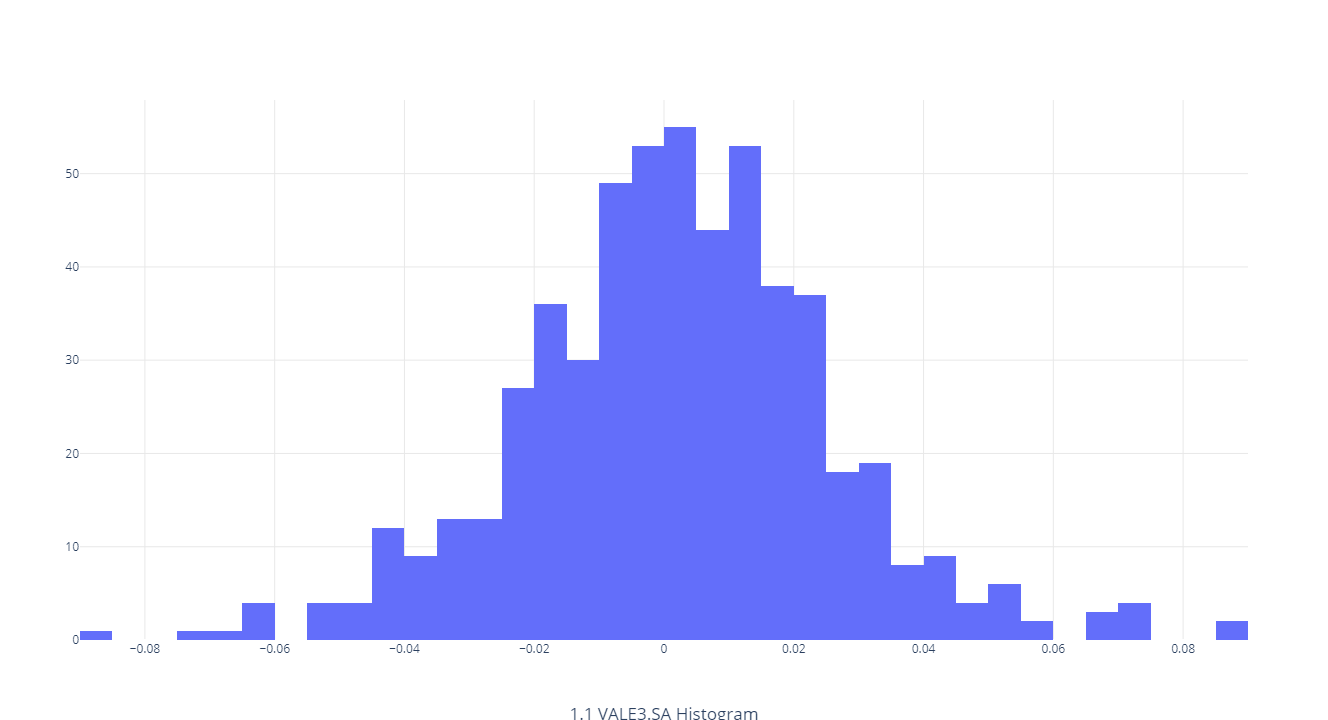

In [196]:
data = [go.Histogram(x=daily_log_returns)]

simple_plot(data, "1.1 VALE3.SA Histogram")

## Getting the data

Our data will be obtained through the pandas-datareader library. Let's test with 3 assets (actions):

In [14]:

import pandas as pd
import numpy as np
import datetime
import pandas_datareader as pdr

import plotly
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

Functions to return formatted data

In [15]:
# we download the stock prices for each ticker and then we do a mapping between data and name of the ticker
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))


Data download

In [16]:
# we download the stock prices for each ticker and then we do a mapping between data and name of the ticker
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))


In [17]:
# Define the stocks to download. We'll download of Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 31/12/2018.
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2019, 12, 31)

all_data = get(tickers, start_date, end_date)

In [18]:
all_data.head(10)

High         Low        Open       Close      Volume  \
Ticker Date                                                                     
AAPL   2016-01-04  105.370003  102.000000  102.610001  105.349998  67649400.0   
       2016-01-05  105.849998  102.410004  105.750000  102.709999  55791000.0   
       2016-01-06  102.370003   99.870003  100.559998  100.699997  68457400.0   
       2016-01-07  100.129997   96.430000   98.680000   96.449997  81094400.0   
       2016-01-08   99.110001   96.760002   98.550003   96.959999  70798000.0   
       2016-01-11   99.059998   97.339996   98.970001   98.529999  49739400.0   
       2016-01-12  100.690002   98.839996  100.550003   99.959999  49154200.0   
       2016-01-13  101.190002   97.300003  100.320000   97.389999  62439600.0   
       2016-01-14  100.480003   95.739998   97.959999   99.519997  63170100.0   
       2016-01-15   97.709999   95.360001   96.199997   97.129997  79833900.0   

                   Adj Close  
Ticker Date                   
AAPL   2016-01-04  97.772148  
       2016-01-05  95.322052  
       2016-01-06  93.456642  
       2016-01-07  89.512329  
       2016-01-08  89.985634  
       2016-01-11  91.442703  
       2016-01-12  92.769859  
       2016-01-13  90.384712  
       2016-01-14  92.361481  
       2016-01-15  90.143433

In [19]:
all_data.tail(10)

High          Low         Open        Close  \
Ticker Date                                                             
^GSPC  2019-12-17  3198.219971  3191.030029  3195.399902  3192.520020   
       2019-12-18  3198.479980  3191.139893  3195.209961  3191.139893   
       2019-12-19  3205.479980  3192.320068  3192.320068  3205.370117   
       2019-12-20  3225.649902  3216.030029  3223.330078  3221.219971   
       2019-12-23  3227.780029  3222.300049  3226.050049  3224.010010   
       2019-12-24  3226.429932  3220.510010  3225.449951  3223.379883   
       2019-12-26  3240.080078  3227.199951  3227.199951  3239.909912   
       2019-12-27  3247.929932  3234.370117  3247.229980  3240.020020   
       2019-12-30  3240.919922  3216.570068  3240.090088  3221.290039   
       2019-12-31  3231.719971  3212.030029  3215.179932  3230.780029   

                         Volume    Adj Close  
Ticker Date                                   
^GSPC  2019-12-17  3.837540e+09  3192.520020  
       2019-12-18  4.014080e+09  3191.139893  
       2019-12-19  3.720450e+09  3205.370117  
       2019-12-20  6.454270e+09  3221.219971  
       2019-12-23  3.060610e+09  3224.010010  
       2019-12-24  1.296540e+09  3223.379883  
       2019-12-26  2.160680e+09  3239.909912  
       2019-12-27  2.428670e+09  3240.020020  
       2019-12-30  3.013290e+09  3221.290039  
       2019-12-31  2.893810e+09  3230.780029

Simplistically calculating portfolio gain

In [20]:
# transform rows in columns
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# get the actual price and split by previous price to find the price variation
cart_pct_change = daily_close_px / daily_close_px.shift(1) - 1

We can also check the accumulated value daily, using the cumprod function, which returns the accumulated value of the list, in this example, the accumulated percentage

In [21]:
# sum all prices variation percentages
cart_return = (1 + cart_pct_change).cumprod()

cart_return.head(10)

Ticker          AAPL      MSFT     ^GSPC
Date                                    
2016-01-04       NaN       NaN       NaN
2016-01-05  0.974941  1.004562  1.002012
2016-01-06  0.955862  0.986314  0.988870
2016-01-07  0.915520  0.952007  0.965434
2016-01-08  0.920361  0.954927  0.954970
2016-01-11  0.935263  0.954380  0.955785
2016-01-12  0.948837  0.963139  0.963243
2016-01-13  0.924442  0.942336  0.939195
2016-01-14  0.944660  0.969161  0.954876
2016-01-15  0.921975  0.930475  0.934251

Finally, to check the portfolio's final yield, just view the last value in the list of accumulated products

In [22]:
# percentual values
final_return = cart_return[-1:].apply(lambda x: (x - 1) *100)
display(final_return)

Ticker            AAPL        MSFT      ^GSPC
Date                                         
2019-12-31  198.283311  212.051727  60.522889

## Plotting the Candlestick

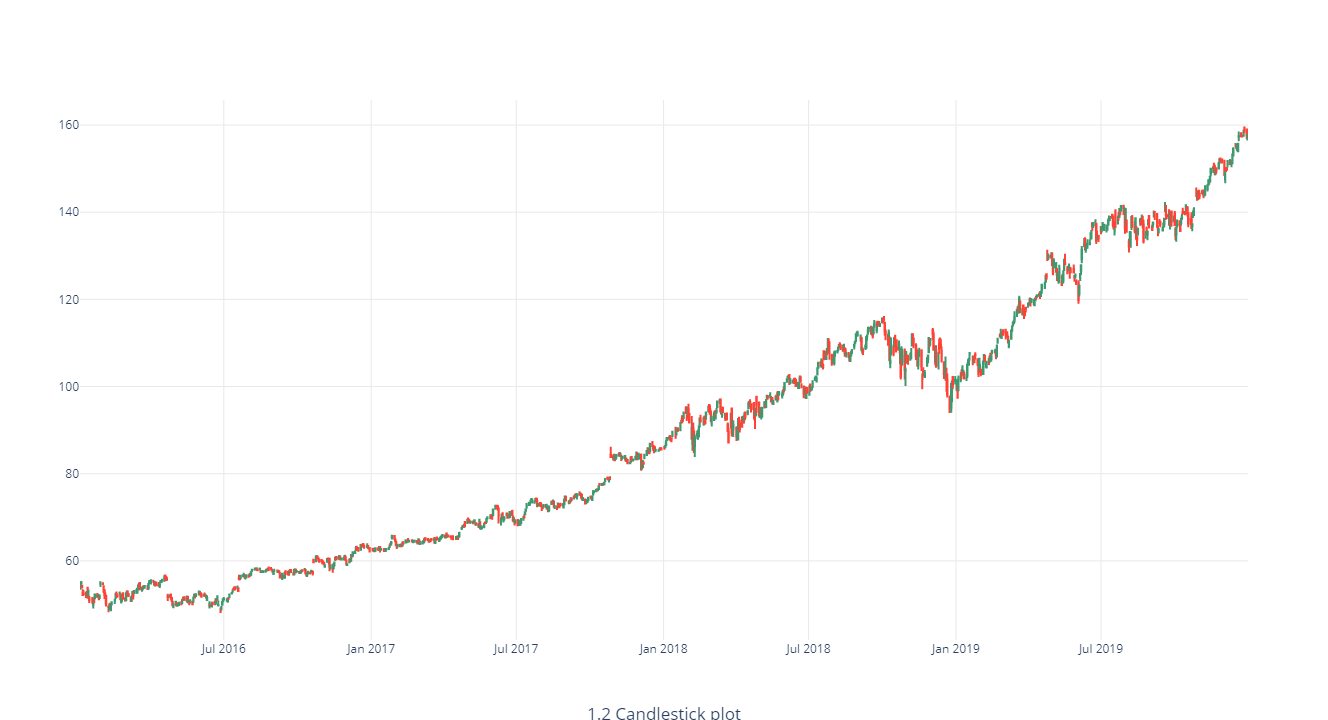

In [188]:
trace = go.Candlestick(x=all_data.loc['MSFT'].index,
                open=all_data.loc['MSFT'].Open,
                high=all_data.loc['MSFT'].High,
                low=all_data.loc['MSFT'].Low,
                close=all_data.loc['MSFT'].Close)
data = [trace]

simple_plot(data, "1.2 Candlestick plot")

## Preparing the data

First we'll reogarnate the dataset structure to facilitate data manipulation and we'll take the closing price

In [49]:
# rearrange data
data = all_data.reset_index()
data = data.set_index(['Date','Ticker']).sort_index()

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = data['Close']

We found out which business days were in the period within the date range we selected earlier. So we reindex our dataset with this new date range. This will cause nonexistent dates to be created with null values (NaN)

In [50]:
# Getting all weekdays between 01/01/2000 and 31/12/2018
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex( pd.MultiIndex.from_product([all_weekdays,  tickers], names=['Date', 'Ticker']),fill_value=np.NaN)
#close = close.fillna(0)
close.head(10)

Date        Ticker
2016-01-01  AAPL              NaN
            MSFT              NaN
            ^GSPC             NaN
2016-01-04  AAPL       105.349998
            MSFT        54.799999
            ^GSPC     2012.660034
2016-01-05  AAPL       102.709999
            MSFT        55.049999
            ^GSPC     2016.709961
2016-01-06  AAPL       100.699997
Name: Close, dtype: float64

Finally, we will transform the ticker column into 3 separate columns, one for each asset.

In [51]:
close = close.reset_index().pivot(index="Date", columns="Ticker", values="Close")

Now our dataset is ready and we can take a look at it.

In [52]:
close.describe()

Ticker         AAPL         MSFT        ^GSPC
count   1006.000000  1006.000000  1006.000000
mean     163.102823    89.671113  2550.731469
std       45.255278    30.162842   333.136042
min       90.339996    48.430000  1829.079956
25%      117.570002    62.685000  2265.872437
50%      165.254997    86.149998  2603.444946
75%      192.505001   110.060001  2817.850098
max      293.649994   158.960007  3240.020020

Calculate the percentage value using the pct_change function

In [53]:
data = all_data.pct_change(1)
data.loc['MSFT'].Close.head()

Date
2016-01-04   -0.813383
2016-01-05    0.004562
2016-01-06   -0.018165
2016-01-07   -0.034783
2016-01-08    0.003067
Name: Close, dtype: float64

It is the equivalent of what we did in calculating the portfolio gain

In [54]:
(daily_close_px / daily_close_px.shift(1) - 1)['MSFT'].head()

Date
2016-01-04         NaN
2016-01-05    0.004562
2016-01-06   -0.018165
2016-01-07   -0.034783
2016-01-08    0.003067
Name: MSFT, dtype: float64

As we will work in a logarithmic way, we will use another strategy to calculate the percentage. First we apply the logarithm to the value of the number and then we calculate the difference using the diff function, which calculates the difference of the values over a list (out [n] = a [n + 1] - a [n])

In [55]:
log_returns = np.log(close.dropna()).diff()
log_returns.head()

Ticker          AAPL      MSFT     ^GSPC
Date                                    
2016-01-04       NaN       NaN       NaN
2016-01-05 -0.025379  0.004552  0.002010
2016-01-06 -0.019764 -0.018332 -0.013202
2016-01-07 -0.043121 -0.035402 -0.023986
2016-01-08  0.005274  0.003062 -0.010898

In addition to the relative price or percentage of the share, we often work with the accumulated relative total, which is the measure that indicates the profitability of a given period.
The graph below represents the percentage value of the share followed by the graph representing the accumulated total. For example, on the accumulated total graph, we note that if a person had invested 1000 in Apple in the early 2000s, they would have increased their capital by almost 6 times.

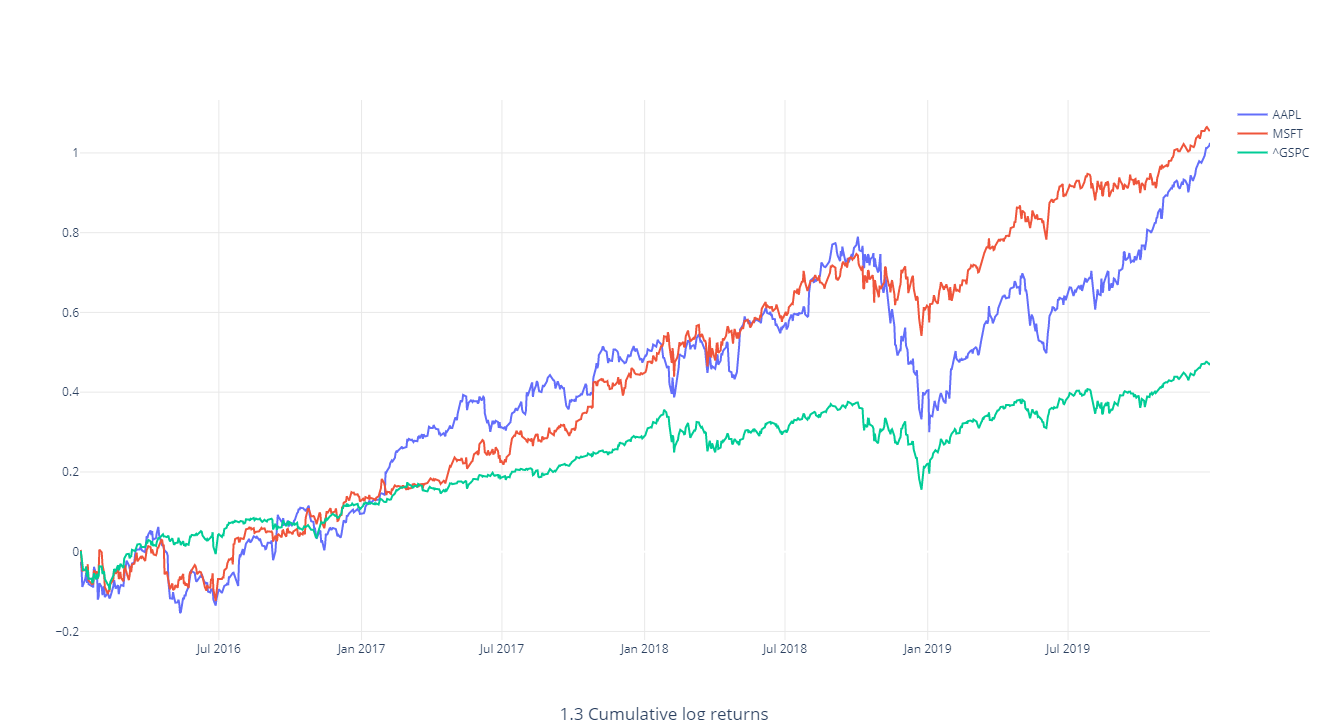

In [199]:
axis = []

for d in log_returns:
    axi = go.Scatter(
                x=log_returns.index,
                y=log_returns[d].cumsum(),
                name = d,
                opacity = 1)
    axis.append(axi)
    
simple_plot(axis, title="1.3 Cumulative log returns")

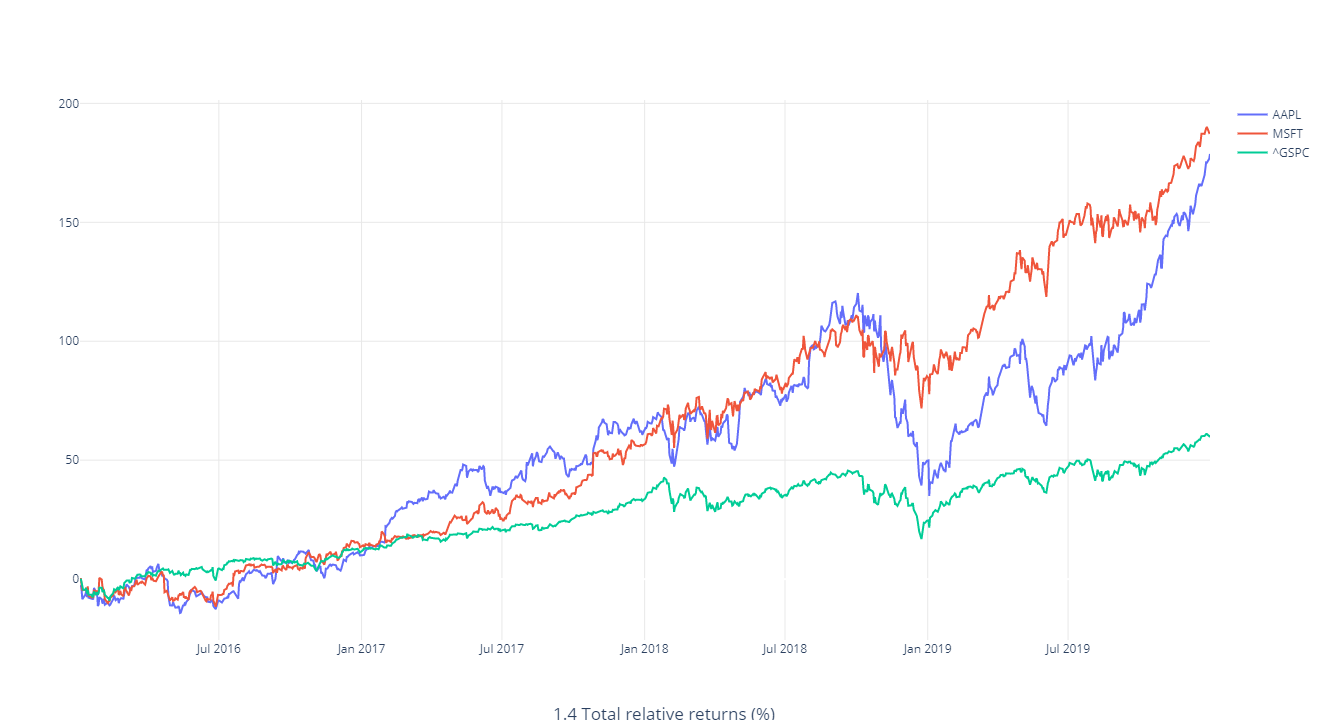

In [200]:
axis = []

for d in log_returns:
    axi = go.Scatter(
                x=log_returns.index,
                y= 100 * (np.exp(log_returns[d].cumsum()) -1),
                name = d,
                opacity = 1)
    axis.append(axi)

simple_plot(axis, "1.4 Total relative returns (%)")


# Chapter 2 - Buy and Hold

Let's assume that we will calculate the yield for the last available day in our portfolio. The simplest way to perform this calculation and multiplying the weight matrix by the stock price matrix on this day. We must first transpose the price matrix

In [61]:
r_t = log_returns.tail(1).transpose()
r_t

Date    2019-12-31
Ticker            
AAPL      0.007280
MSFT      0.000698
^GSPC     0.002942

Then create the stock weights matrix within the portfolio. Here we use 1/3, as each of the three shares has the same weight in the portfolio.

In [62]:
weights_vector = pd.DataFrame(1 / 3, index=r_t.index, columns=r_t.columns)
weights_vector

Date    2019-12-31
Ticker            
AAPL      0.333333
MSFT      0.333333
^GSPC     0.333333

We perform the multiplication and we have the income of the portfolio as a whole

In [63]:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

Date        2019-12-31
Date                  
2019-12-31     0.00364

In order to calculate for the entire time period

In [64]:
weights_matrix = pd.DataFrame(1 / 3, index=log_returns.index, columns=log_returns.columns)
weights_matrix.head()

Ticker          AAPL      MSFT     ^GSPC
Date                                    
2016-01-04  0.333333  0.333333  0.333333
2016-01-05  0.333333  0.333333  0.333333
2016-01-06  0.333333  0.333333  0.333333
2016-01-07  0.333333  0.333333  0.333333
2016-01-08  0.333333  0.333333  0.333333

In [65]:
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.tail()

Date        2016-01-04  2016-01-05  2016-01-06  2016-01-07  2016-01-08  \
Date                                                                     
2019-12-24         NaN   -0.006272   -0.017099    -0.03417   -0.000854   
2019-12-26         NaN   -0.006272   -0.017099    -0.03417   -0.000854   
2019-12-27         NaN   -0.006272   -0.017099    -0.03417   -0.000854   
2019-12-30         NaN   -0.006272   -0.017099    -0.03417   -0.000854   
2019-12-31         NaN   -0.006272   -0.017099    -0.03417   -0.000854   

Date        2016-01-11  2016-01-12  2016-01-13  2016-01-14  2016-01-15  ...  \
Date                                                                    ...   
2019-12-24    0.005447    0.010439   -0.024388    0.022087    -0.02896  ...   
2019-12-26    0.005447    0.010439   -0.024388    0.022087    -0.02896  ...   
2019-12-27    0.005447    0.010439   -0.024388    0.022087    -0.02896  ...   
2019-12-30    0.005447    0.010439   -0.024388    0.022087    -0.02896  ...   
2019-12-31    0.005447    0.010439   -0.024388    0.022087    -0.02896  ...   

Date        2019-12-17  2019-12-18  2019-12-19  2019-12-20  2019-12-23  \
Date                                                                     
2019-12-24   -0.001039   -0.001632    0.004698    0.004573    0.005684   
2019-12-26   -0.001039   -0.001632    0.004698    0.004573    0.005684   
2019-12-27   -0.001039   -0.001632    0.004698    0.004573    0.005684   
2019-12-30   -0.001039   -0.001632    0.004698    0.004573    0.005684   
2019-12-31   -0.001039   -0.001632    0.004698    0.004573    0.005684   

Date        2019-12-24  2019-12-26  2019-12-27  2019-12-30  2019-12-31  
Date                                                                    
2019-12-24    0.000188    0.010975    0.000494   -0.002845     0.00364  
2019-12-26    0.000188    0.010975    0.000494   -0.002845     0.00364  
2019-12-27    0.000188    0.010975    0.000494   -0.002845     0.00364  
2019-12-30    0.000188    0.010975    0.000494   -0.002845     0.00364  
2019-12-31    0.000188    0.010975    0.000494   -0.002845     0.00364  

[5 rows x 1006 columns]

The value we are looking for is at the diagonal of the matrix, as you can see that is when the dates of the original matrices intersect. To increase this value, we use the diag function of numpy

In [66]:
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns = portfolio_log_returns[1:]
portfolio_log_returns.tail()

Date
2019-12-24    0.000188
2019-12-26    0.010975
2019-12-27    0.000494
2019-12-30   -0.002845
2019-12-31    0.003640
dtype: float64

The plotting of the graphs is similar to what we have done previously

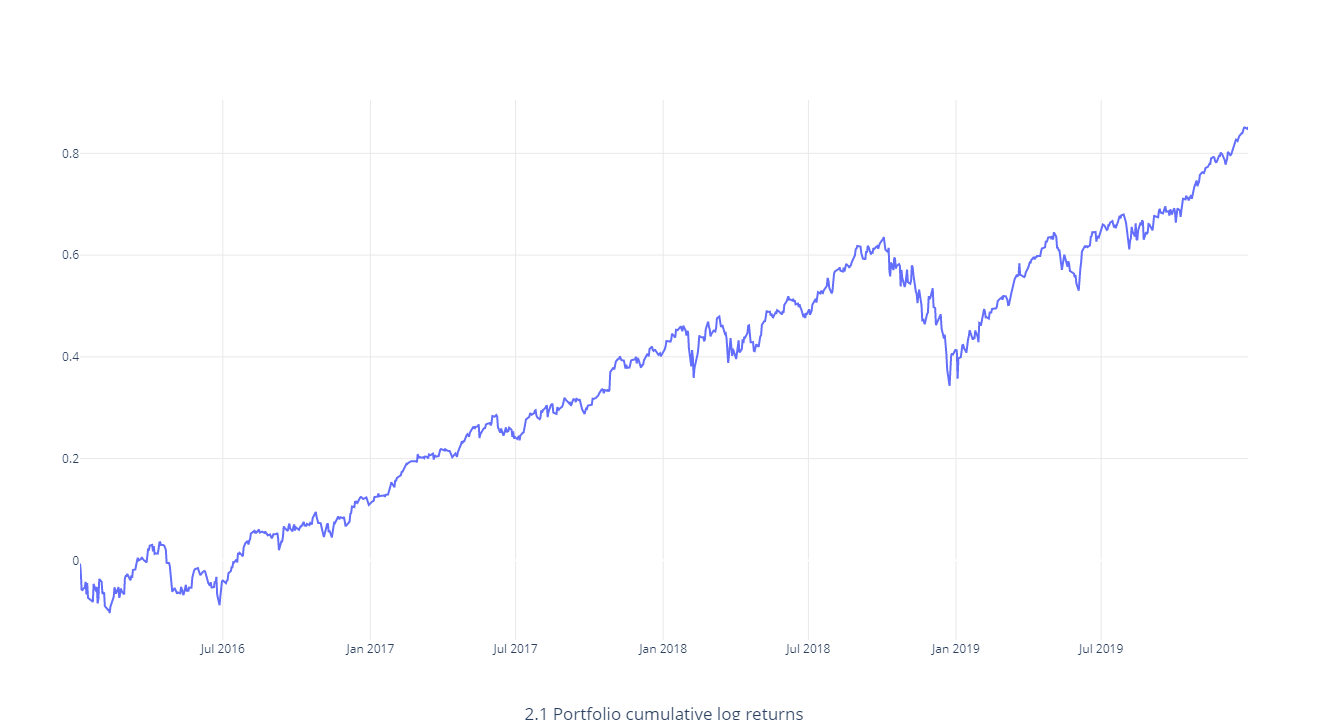

In [201]:
axis = go.Scatter(
            x=portfolio_log_returns.index,
            y=portfolio_log_returns.cumsum(),
            opacity = 1)

simple_plot(axis, "2.1 Portfolio cumulative log returns")

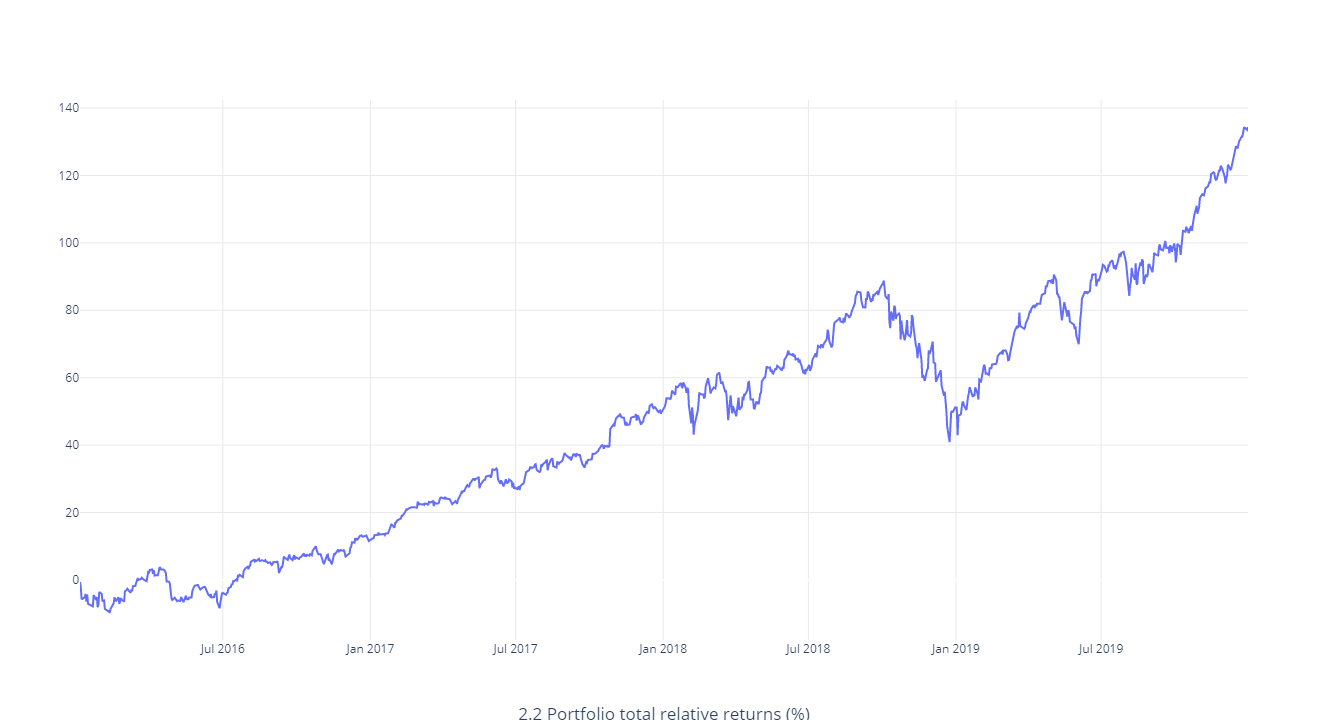

In [202]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

    
axis = go.Scatter(
            x = total_relative_returns.index,
            y = total_relative_returns * 100,
            opacity = 1)
    
simple_plot(axis, '2.2 Portfolio total relative returns (%)')

# Chapter 3 - Trading analysis by moving averages

## Simple moving average

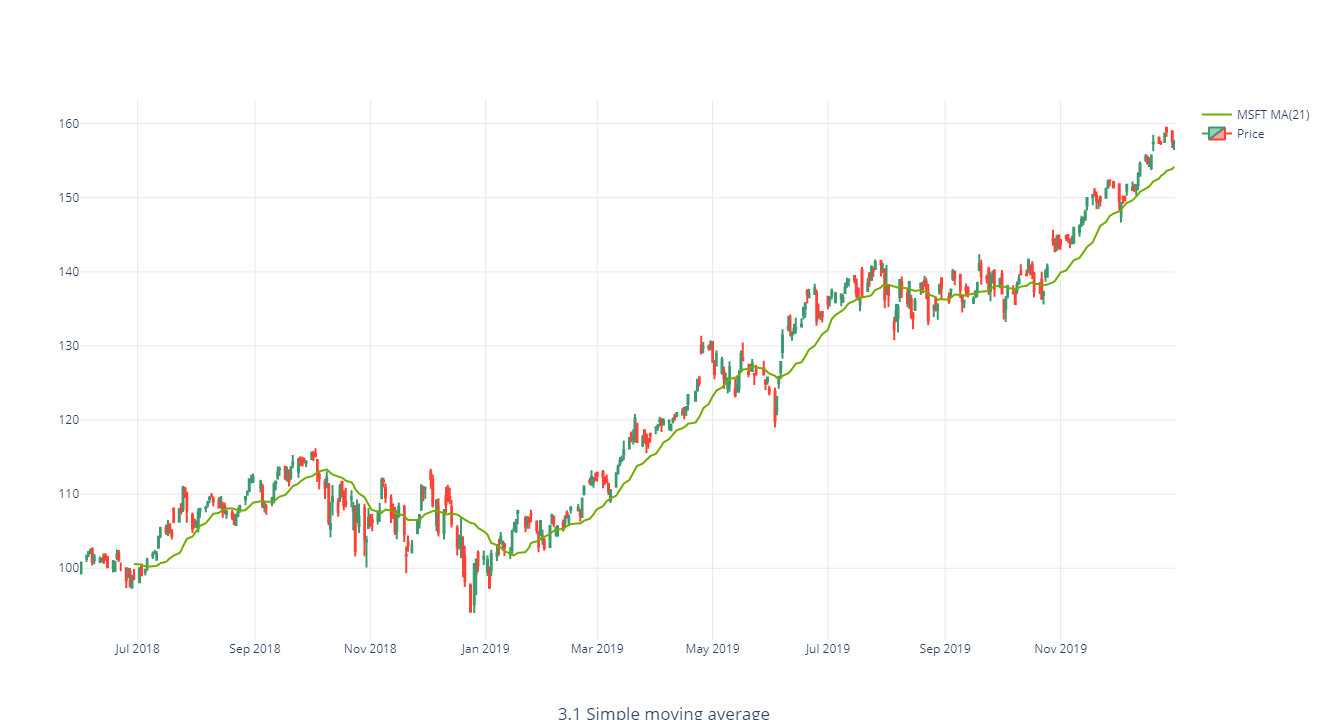

In [203]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date and drop NA rows.
msft = all_data.loc['MSFT'].dropna()
msft = msft['2018-06-01':]

window = 21
# Calculate the  21 days moving averages of the closing prices
MA = msft.Close.rolling(window=window).mean()



trace_avg = go.Scatter(
                x=MA.index,
                y=MA,
                name = "MSFT MA(21)",
                line = dict(color = '#72ac00'),
                opacity = 1)

trace_candles = go.Candlestick(x=msft.index,
                    open=msft.Open,
                    high=msft.High,
                    low=msft.Low,
                    close=msft.Close,
                    name = "Price")

data = [trace_avg, trace_candles]

simple_plot(data, "3.1 Simple moving average")

## Exponential moving average

In [212]:
window = 21
K = ( 2 / (window + 1))

msft = all_data.loc['MSFT'].dropna()
msft = msft['2018-06-01':]

MA = msft.Close.rolling(window=window).mean().dropna()


In [213]:
ema_data = pd.DataFrame(index=MA.index)
ema_data['Price'] = msft.Close
ema_data['MA'] = MA
ema_data['EMA'] = np.NaN

ema_data.EMA[0] = ema_data.MA[1]

for i in range(1, len(ema_data)):
    ema_data.EMA[i] = (ema_data.Price[i] * K) + ((1 - K) * ema_data.EMA[i-1]) 

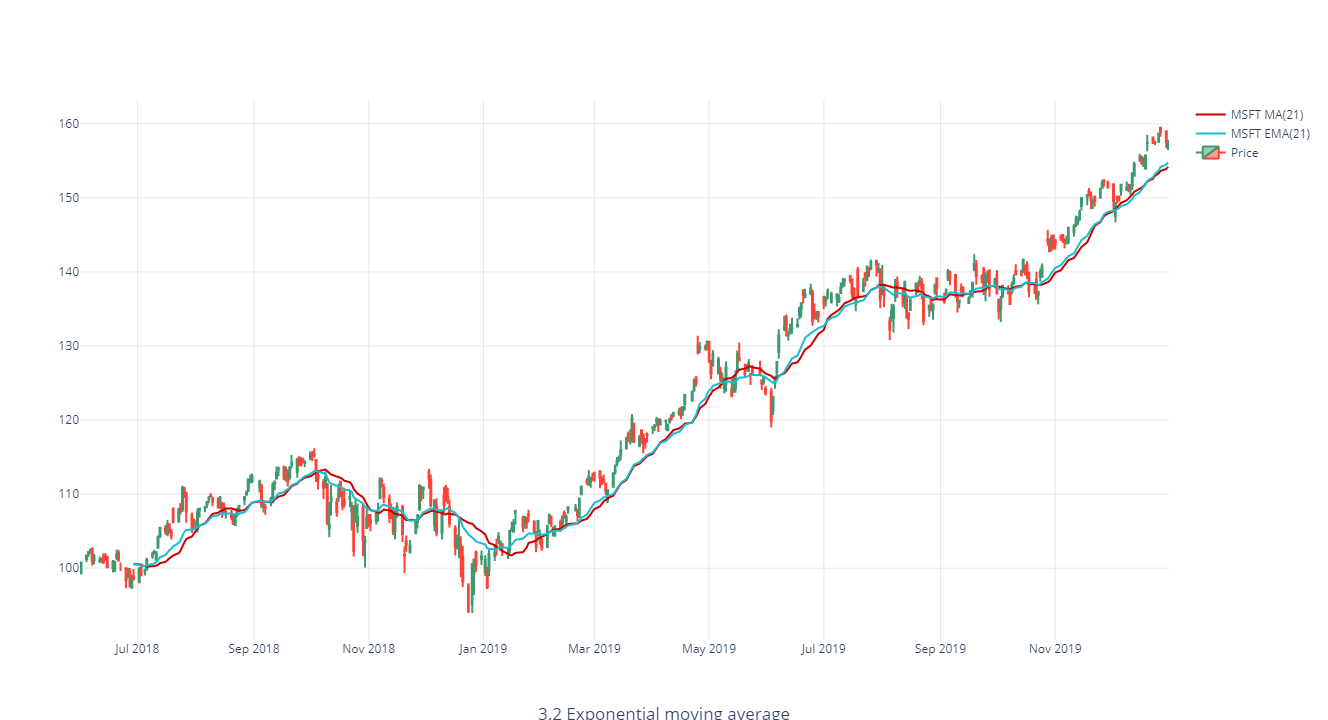

In [214]:
trace_ma = go.Scatter(
                x=ema_data.index,
                y=ema_data.MA,
                name = "MSFT MA(21)",
                line = dict(color = '#CC0000'),
                opacity = 1)

trace_ema = go.Scatter(
                x=ema_data.index,
                y=ema_data.EMA,
                name = "MSFT EMA(21)",
                line = dict(color = '#17BECF'),
                opacity = 1)

trace_candles = go.Candlestick(x=msft.index,
                    open=msft.Open,
                    high=msft.High,
                    low=msft.Low,
                    close=msft.Close,
                    name = "Price")

data = [trace_ma, trace_ema, trace_candles]

simple_plot(data, "3.2 Exponential moving average")

# Moving average crossover

In [216]:
# Calculate the 9 and 21 days moving averages of the closing prices
short_rolling_msft = msft['2019-01-01':].Close.rolling(window=9).mean()
long_rolling_msft = msft['2019-01-01':].Close.rolling(window=21).mean()

The rolling function was used in conjunction with the mean () function. In this scenario we are calculating the average of the values selected in our "window" of time. We could use other functions, like sum () to add them or std () to calculate the standard deviation.

To plot the graph, we will use the plotly. We started by creating the 3 necessary axes: axis of the short average, axis of the long average, axis of the price.

In [217]:
trace_short = go.Scatter(
                x=short_rolling_msft.index,
                y=short_rolling_msft,
                name = "MSFT Short",
                line = dict(color = '#17BECF'),
                opacity = 1)

trace_long = go.Scatter(
                x=long_rolling_msft.index,
                y=long_rolling_msft,
                name = "MSFT Long",
                line = dict(color = '#7F7F7F'),
                opacity = 1)

trace_price = go.Candlestick(x=msft['2019-01-01':].index,
                    open=msft['2019-01-01':].Open,
                    high=msft['2019-01-01':].High,
                    low=msft['2019-01-01':].Low,
                    close=msft['2019-01-01':].Close,
                    name = "Price")

data = [trace_short, trace_long, trace_price]

Then we invoke the plotting function

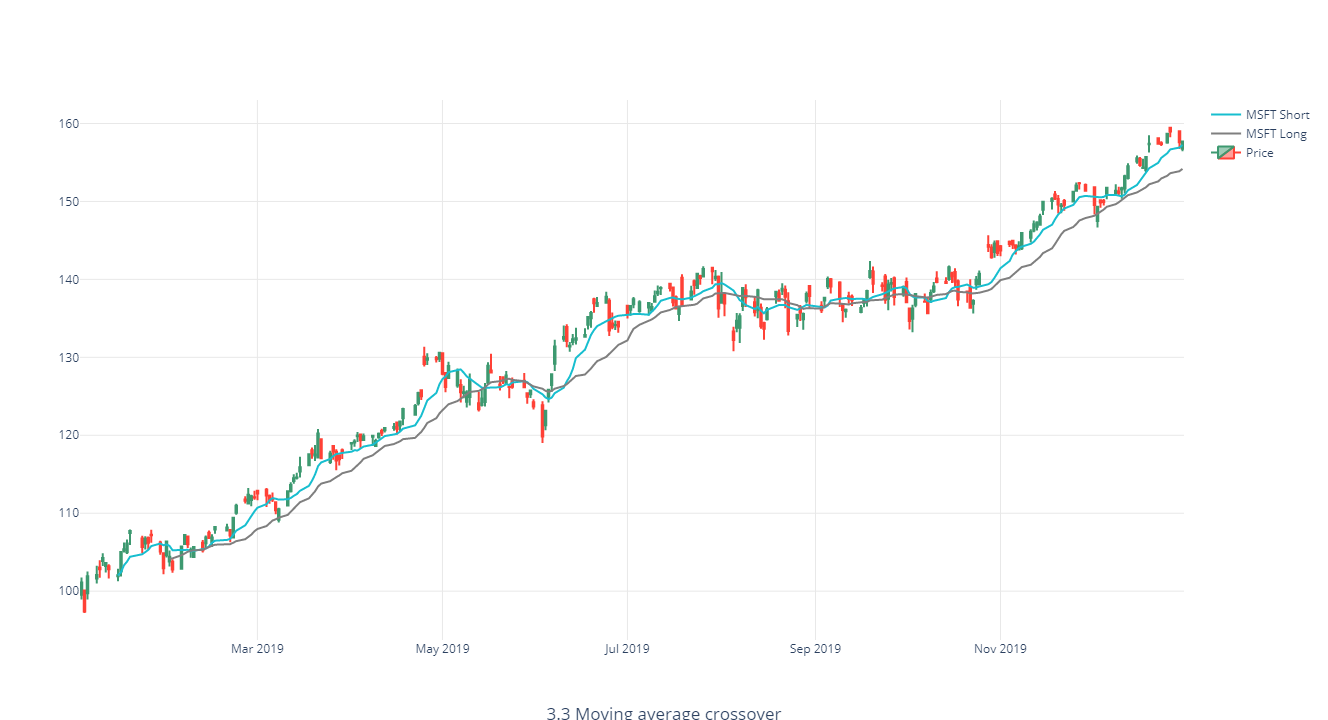

In [218]:
simple_plot(data, "3.3 Moving average crossover")

# Chapter 4 - MACD

In [219]:
from plotly import tools

msft = all_data.loc['MSFT'].dropna()
msft = msft['2018-06-01':]

In [220]:
def get_ema(window, prices):
    K = ( 2 / (window + 1))
    ma = prices.rolling(window=window).mean().dropna()

    data = pd.DataFrame(index=ma.index)
    data['Price'] = prices
    data['EMA'] = np.NaN

    data.EMA[0] = ma[1]

    for i in range(1, len(data)):
        data.EMA[i] = (data.Price[i] * K) + ((1 - K) * data.EMA[i-1]) 

    return data

In [221]:
mm_12 = get_ema(12, msft.Close)
mm_26 = get_ema(26, msft.Close)

mm_macd = mm_12.EMA - mm_26.EMA
mm_signal = get_ema(9, mm_macd.dropna()).EMA

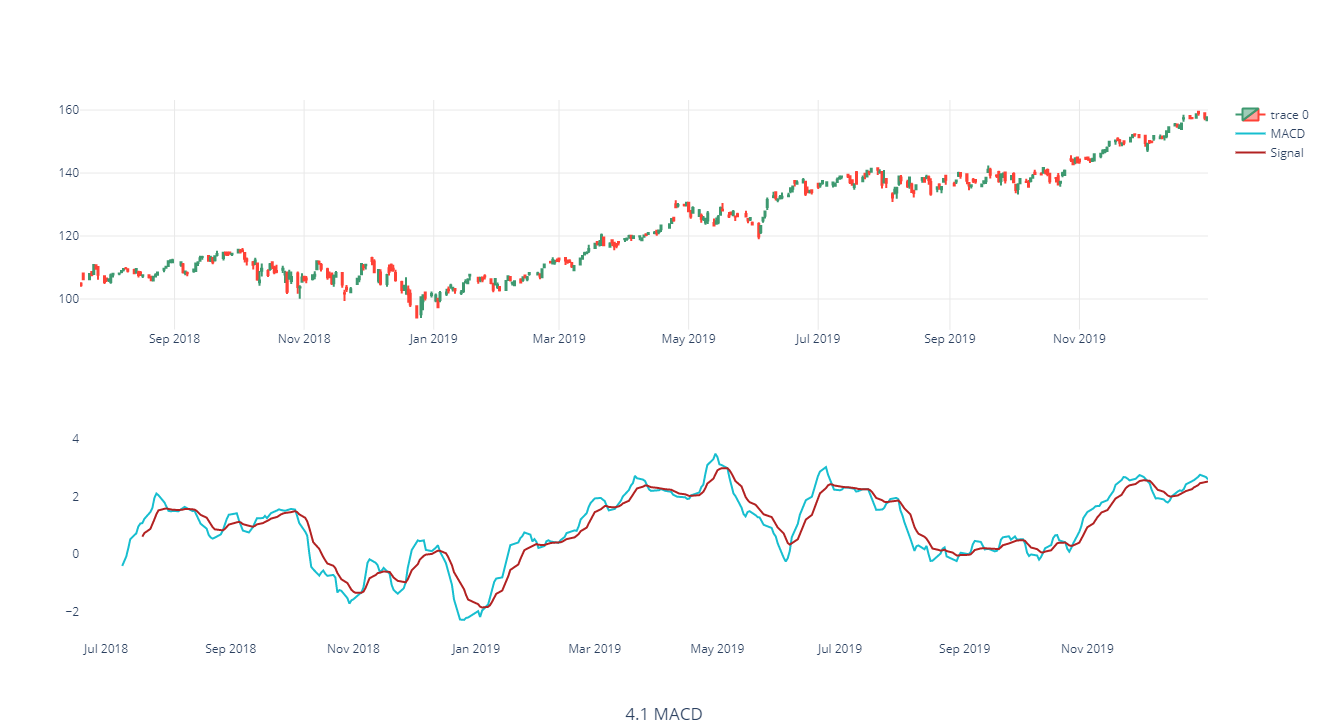

In [261]:
msft = msft[mm_signal.index[0]:]

trace_macd = go.Scatter(
                    x=mm_macd.index,
                    y=mm_macd,
                    name = "MACD",
                    line = dict(color = '#17BECF'),
                    opacity = 1)

trace_signal = go.Scatter(
                    x=mm_signal.index,
                    y=mm_signal,
                    name = "Signal",
                    line = dict(color = '#B22222'),
                    opacity = 1)

trace_candles = go.Candlestick(x=msft.index,
                    open=msft.Open,
                    high=msft.High,
                    low=msft.Low,
                    close=msft.Close)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace_candles, 1, 1)
fig.append_trace(trace_macd, 2, 1)
fig.append_trace(trace_signal, 2, 1)

fig['layout']['yaxis2'].update(range=[-3, 5])

simple_config_plot(fig, "4.1 MACD")

fig.show() 

## MACD histogram

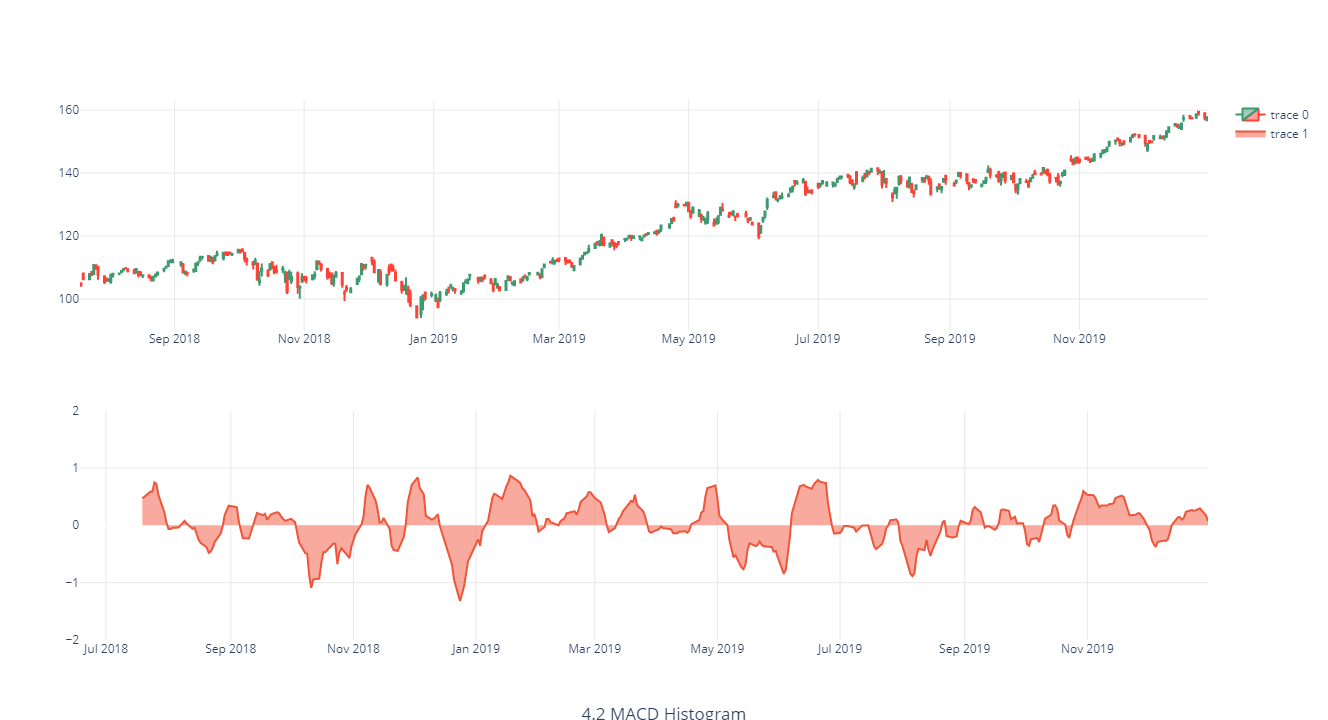

In [264]:
hist_macd = mm_macd - mm_signal

trace_hist_macd = go.Scatter(
                    x=hist_macd.index,
                    y=hist_macd,
                    fill='tozeroy')

trace_candles = go.Candlestick(x=msft.index,
                    open=msft.Open,
                    high=msft.High,
                    low=msft.Low,
                    close=msft.Close)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace_candles, 1, 1)
fig.append_trace(trace_hist_macd, 2, 1)

fig['layout']['yaxis2'].update(range=[-2, 2],
        showgrid=True,
        gridwidth=1,
        gridcolor='#E8E8E8')

fig['layout']['xaxis2'].update(
        showgrid=True,
        gridwidth=1,
        gridcolor='#E8E8E8')

fig = go.Figure(fig)
simple_config_plot(fig, "4.2 MACD Histogram")
fig.show() 

# Chapter 5 - HiLo Activator

hilo averages calculation

In [238]:
aapl = all_data.loc['AAPL']['2018-01-01':'2018-12-31'].dropna()

aapl_high_avg = aapl.High.rolling(window=8).mean()
aapl_low_avg = aapl.Low.rolling(window=8).mean()

Plot the averages together with the candle

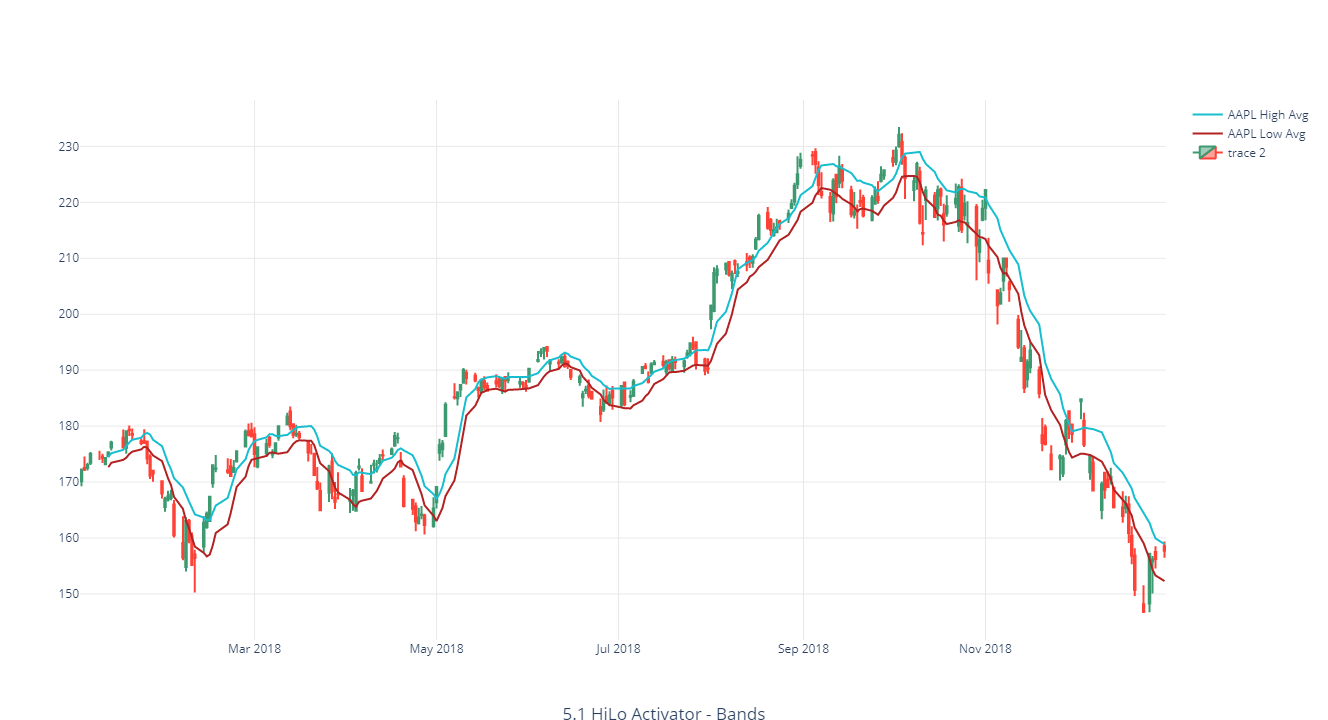

In [239]:
trace_high = go.Scatter(
                x=aapl_high_avg.index,
                y=aapl_high_avg,
                name = "AAPL High Avg",
                line = dict(color = '#17BECF'),
                opacity = 1)

trace_low = go.Scatter(
                x=aapl_low_avg.index,
                y=aapl_low_avg,
                name = "AAPL Low Avg",
                line = dict(color = '#B22222'),
                opacity = 1)

trace = go.Candlestick(x=aapl.index,
                open=aapl.Open,
                high=aapl.High,
                low=aapl.Low,
                close=aapl.Close)
data = [trace_high, trace_low, trace]

simple_plot(data, "5.1 HiLo Activator - Bands")

In [240]:
aapl_high = pd.DataFrame(index=aapl.index)
aapl_low = pd.DataFrame(index=aapl.index)

In [241]:
aapl_high['high'] = np.where(aapl.Close > aapl_high_avg, aapl_low_avg, np.NaN)
aapl_low['low'] = np.where(aapl.Close < aapl_low_avg, aapl_high_avg, np.NaN)

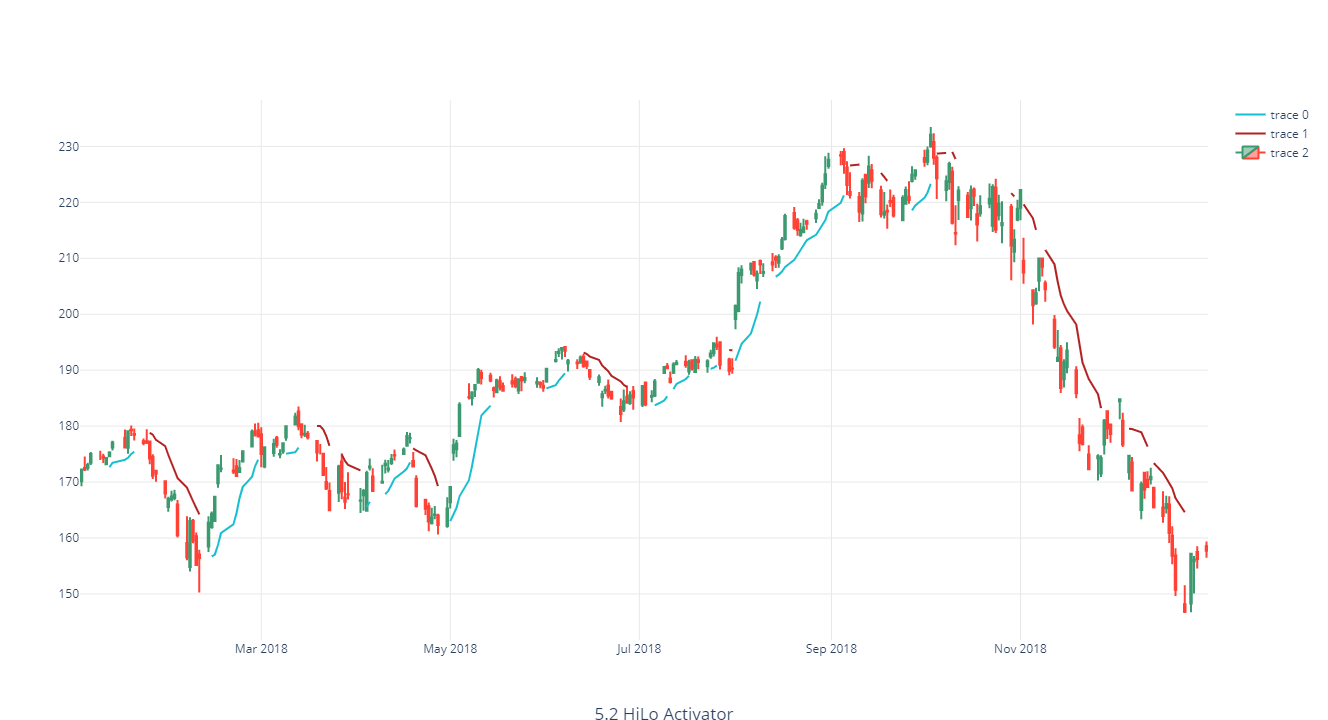

In [242]:
trace_high = go.Scatter(
                x=aapl_high.index,
                y=aapl_high.high,
                line = dict(color = '#17BECF'),
                opacity = 1)

trace_low = go.Scatter(
                x=aapl_low.index,
                y=aapl_low.low,
                line = dict(color = '#B22222'),
                opacity = 1)

trace = go.Candlestick(x=aapl.index,
                open=aapl.Open,
                high=aapl.High,
                low=aapl.Low,
                close=aapl.Close)
data = [trace_high, trace_low, trace]

simple_plot(data, "5.2 HiLo Activator")


# Chapter 6 - Bollinger Bands

In [243]:
window = 20

aapl = all_data.loc['AAPL']['2018-01-01':'2018-12-31'].dropna()

aapl_avg = aapl.Close.rolling(window=window).mean().dropna()
aapl_std = aapl.Close.rolling(window=window).std().dropna()

In [244]:
aapl_bollinger = pd.DataFrame(index=aapl_avg.index)
aapl_bollinger['mband'] = aapl_avg
aapl_bollinger['uband'] = aapl_avg + aapl_std.apply(lambda x: (x * 2))
aapl_bollinger['lband'] = aapl_avg - aapl_std.apply(lambda x: (x * 2))

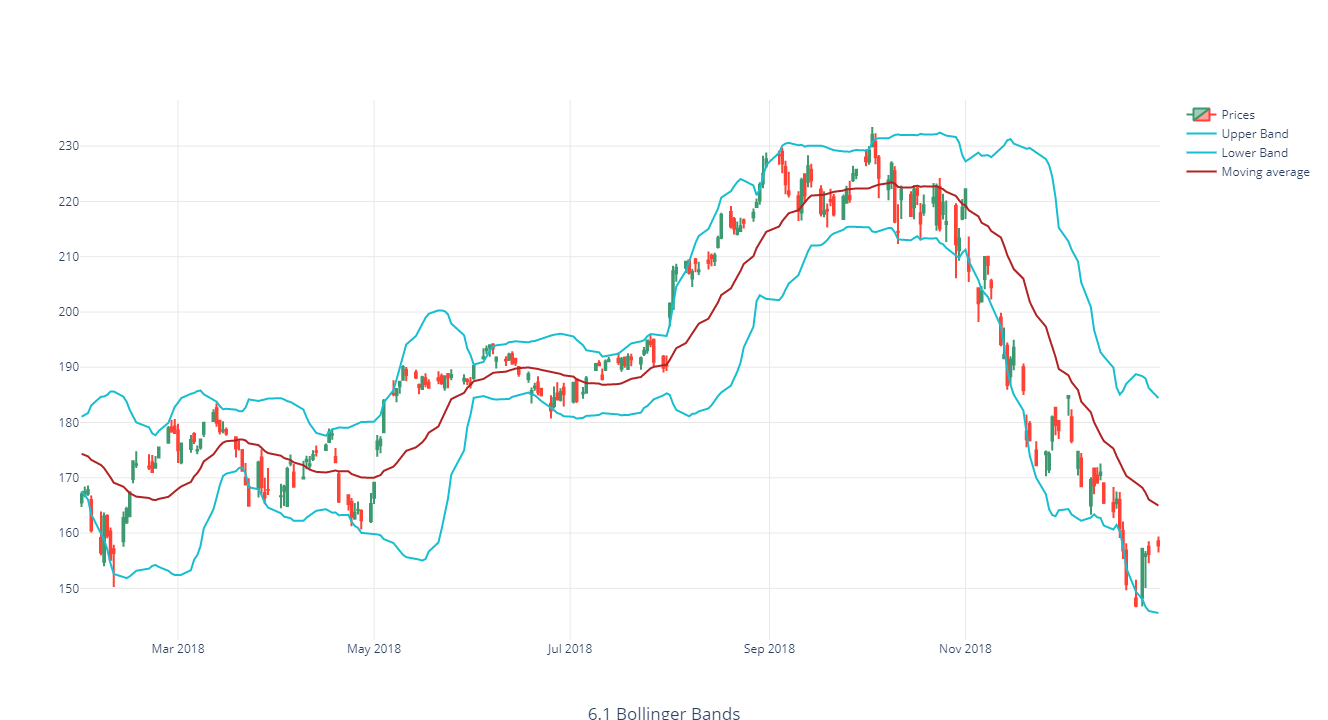

In [245]:
aapl_prices = aapl[aapl_bollinger.index[0]:]

prices = go.Candlestick(x=aapl_prices.index,
                open=aapl_prices.Open,
                high=aapl_prices.High,
                low=aapl_prices.Low,
                name = "Prices",
                close=aapl_prices.Close)

uband = go.Scatter(
                x=aapl_bollinger.index,
                y=aapl_bollinger.uband,
                name = "Upper Band",
                line = dict(color = '#17BECF'),
                opacity = 1)

mband = go.Scatter(
                x=aapl_bollinger.index,
                y=aapl_bollinger.mband,
                name = "Moving average",
                line = dict(color = '#B22222'),
                opacity = 1)

lband = go.Scatter(
                x=aapl_bollinger.index,
                y=aapl_bollinger.lband,
                name = "Lower Band",
                line = dict(color = '#17BECF'),
                opacity = 1)
data = [prices, uband, lband, mband]

simple_plot(data, "6.1 Bollinger Bands")

# Chapter 7 - IFR

In [246]:
window = 14

aapl = all_data.loc['AAPL'].dropna()
aapl = aapl['2018-06-01':'2019-02-22']

ifr = pd.DataFrame(index=aapl.index)

# get the percentual changes between day[i] and day[i-1]
ifr_changes = aapl.Close.diff(1)

# get days with positive profit (gain)
ifr['gain'] = ifr_changes[ifr_changes > 0]

# get days with negative profit (loss)
ifr['loss'] = ifr_changes[ifr_changes < 0] * (-1)

# gain and loss mean
ifr['gainAvg'] = np.NaN
ifr['lossAvg'] = np.NaN

# get the mean for "window" period
ifr.gainAvg[window] = ifr.iloc[0:window].gain.mean()
ifr.lossAvg[window] = ifr.iloc[0:window].loss.mean()

ifr = ifr[window:].fillna(0.0)

# apply the formula
for i in range(1, len(ifr)):
    ifr.gainAvg[i] = (ifr.gainAvg[i-1] * (window -1) + ifr.gain[i]) / window
    ifr.lossAvg[i] = (ifr.lossAvg[i-1] * (window -1) + ifr.loss[i]) / window
        
ifr['value'] = 100 - (100 / (1 + (ifr.gainAvg / ifr.lossAvg )))


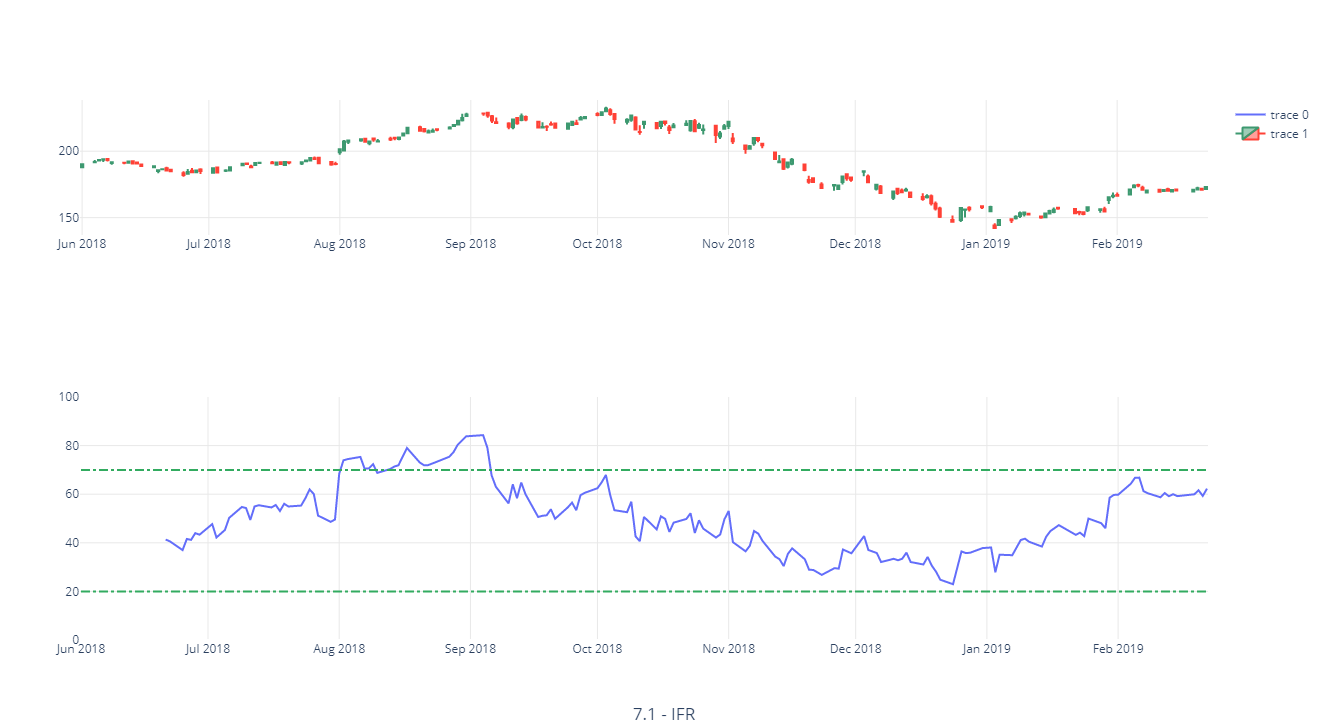

In [258]:
trace_ifr = go.Scatter(
                    x=ifr.index,
                    y=ifr.value,
                    xaxis='x2',
                    yaxis='y2')

trace_candles = go.Candlestick(x=aapl.index,
                    open=aapl.Open,
                    high=aapl.High,
                    low=aapl.Low,
                    close=aapl.Close)

data = [trace_ifr, trace_candles]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 1],
        rangeslider={"visible": False},
    ),
    yaxis=dict(
        domain=[0.75, 1],        
    ),
    xaxis2=dict(
        domain=[0, 1],
        anchor='y2',
        showgrid=True,
        gridwidth=1,
        gridcolor='#E8E8E8',        
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2',
        range=[0, 100],
        showgrid=True,
        gridwidth=1,
        gridcolor='#E8E8E8',        
        
    ),
        shapes=[
            # Line Horizontal
            {
                'xref': 'x2',
                'yref': 'y2',
                'type': 'line',
                'x0': aapl.index[0],
                'y0': '20',
                'x1': aapl.index[-1],
                'y1': '20',
                'line': {
                    'color': 'rgb(50, 171, 96)',
                    'width': 2,
                    'dash': 'dashdot',
                },
            },
            {
                'xref': 'x2',
                'yref': 'y2',
                'type': 'line',
                'x0': aapl.index[0],
                'y0': '70',
                'x1': aapl.index[-1],
                'y1': '70',
                'line': {
                    'color': 'rgb(50, 171, 96)',
                    'width': 2,
                    'dash': 'dashdot',
                },
            }        
        ]        
    
)
fig = go.Figure(data=data, layout=layout)
simple_config_plot(fig, "7.1 - IFR")
fig.show()

# Chapter 8 - OBV

In [251]:
aapl = all_data.loc['AAPL'].dropna()
aapl = aapl['2018-06-01':'2019-02-22']

obv = pd.DataFrame(index=aapl.index)

# get the percentual changes between day[i] and day[i-1]
obv_changes = aapl.Close - aapl.Open

obv['open'] = aapl.Open
obv['close'] = aapl.Close
obv['volume'] = np.where(obv_changes > 0, aapl.Volume , aapl.Volume * (-1))

# get days with positive profit (gain)
obv['volume_sum'] = obv.volume.cumsum()

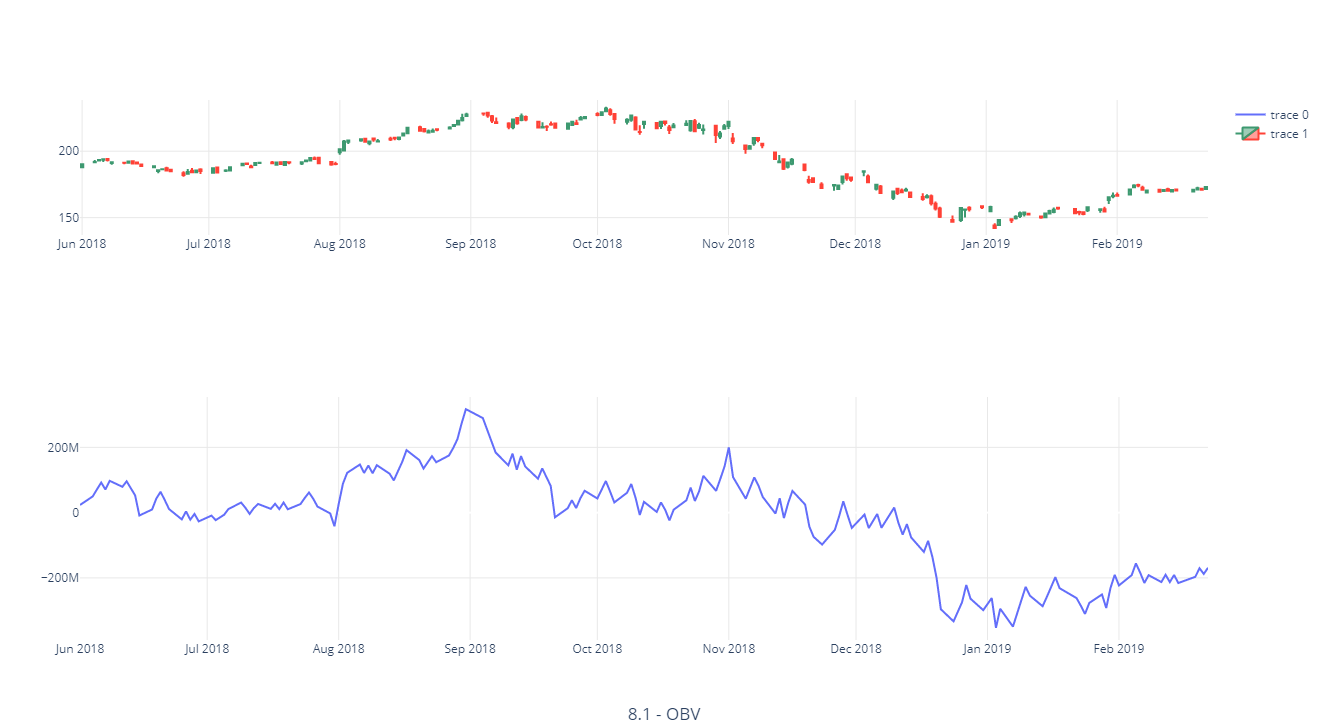

In [257]:
trace_obv = go.Scatter(
                    x=obv.index,
                    y=obv.volume_sum,
                    xaxis='x2',
                    yaxis='y2')

trace_candles = go.Candlestick(x=aapl.index,
                    open=aapl.Open,
                    high=aapl.High,
                    low=aapl.Low,
                    close=aapl.Close)

data = [trace_obv, trace_candles]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 1],
        rangeslider={"visible": False},
    ),
    yaxis=dict(
        domain=[0.75, 1],        
    ),
    xaxis2=dict(
        domain=[0, 1],
        anchor='y2',
        showgrid=True,
        gridwidth=1,
        gridcolor='#E8E8E8',
        
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2',
        showgrid=True,
        gridwidth=1,
        gridcolor='#E8E8E8',
    )
)
fig = go.Figure(data=data, layout=layout)

simple_config_plot(fig, "8.1 - OBV")

fig.show()

# Chapter 9 - EMA 9 Strategy...

In [265]:
tickers = ['VALE3.SA']

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2018, 6, 28)

all_data = get(tickers, start_date, end_date)

In [266]:

vale3 = all_data.loc['VALE3.SA'].dropna()

vale3['EMA'] = get_ema(9, vale3.Close).EMA

# get the "slope of EMA9 9"
dif = vale3.EMA - vale3.shift(1).EMA

# ema 9 crossed the candle (open/close price) and ema 9 has an ascendent slope  ?
vale3['mark_max'] = np.where((vale3.EMA < vale3.High) & (vale3.EMA > vale3.Low) & (dif > 0), vale3.High, 0)

# ema 9 crossed the candle (open/close price) and ema 9 has an descendent slope  ?
vale3['mark_min'] = np.where((vale3.EMA > vale3.Low) & (vale3.EMA < vale3.High) & (dif < 0), vale3.Low, 0)

# get start point
vale3['buy_start'] = np.where((vale3.Low < vale3.shift(1).mark_max) & (vale3.High > vale3.shift(1).mark_max), vale3.shift(1).mark_max, np.NaN)
vale3['sell_start'] = np.where((vale3.Low < vale3.shift(1).mark_min) & (vale3.High > vale3.shift(1).mark_min), vale3.shift(1).mark_min, np.NaN)

# set stop loss
vale3['buy_stop'] = np.where((vale3.Low < vale3.shift(1).mark_max) & (vale3.High > vale3.shift(1).mark_max), vale3.shift(1).Low, np.NaN)
vale3['sell_stop'] = np.where((vale3.Low < vale3.shift(1).mark_min) & (vale3.High > vale3.shift(1).mark_min), vale3.shift(1).High, np.NaN)

display(vale3[["buy_start", "buy_stop"]][(vale3.buy_start > 0)])
display(vale3[["sell_start", "sell_stop"]][(vale3.sell_start > 0)])

buy_start   buy_stop
Date                            
2018-01-18  43.220001  42.360001
2018-02-07  42.470001  39.930000
2018-04-02  42.750000  41.740002
2018-04-09  43.099998  42.250000
2018-06-04  53.080002  50.650002
2018-06-05  53.450001  51.759998

sell_start  sell_stop
Date                             
2018-02-02   41.570000  42.470001
2018-02-05   40.750000  41.650002
2018-02-06   40.330002  42.040001
2018-02-09   41.070000  42.130001
2018-03-01   44.650002  47.090000
2018-03-15   42.570000  43.340000
2018-03-16   42.130001  42.820000
2018-03-23   41.619999  42.250000
2018-03-27   41.610001  42.380001
2018-03-28   40.720001  42.389999
2018-05-22   53.000000  55.099998
2018-05-25   51.259998  53.000000
2018-05-28   51.049999  52.790001
2018-05-29   50.709999  52.459999
2018-05-30   49.990002  52.060001
2018-06-11   50.660000  53.990002
2018-06-28   47.900002  49.279999

## EMA 9 Strategy with 2 moving averages...

In [267]:
tickers = ['VALE3.SA']

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2018, 6, 28)

all_data = get(tickers, start_date, end_date)

In [268]:
vale3 = all_data.loc['VALE3.SA'].dropna()

vale3['EMA9'] = get_ema(9, vale3.Close).EMA
vale3['EMA1'] = get_ema(1, vale3.Close).EMA


buy_cross = (vale3.shift(1).EMA1 < vale3.shift(1).EMA9) & (vale3.EMA1 > vale3.shift(1).EMA9)
sell_cross = (vale3.shift(1).EMA1 > vale3.shift(1).EMA9) & (vale3.EMA1 < vale3.shift(1).EMA9)

# ema 9 crossed the candle (open/close price) and ema 9 has an ascendent slope  ?
vale3['mark_max'] = np.where((vale3.EMA9 < vale3.High) & (vale3.EMA9 > vale3.Low) & (buy_cross == True), vale3.High, 0)

# ema 9 crossed the candle (open/close price) and ema 9 has an descendent slope  ?
vale3['mark_min'] = np.where((vale3.EMA9 > vale3.Low) & (vale3.EMA9 < vale3.High) & (sell_cross == True), vale3.Low, 0)

# get start point
vale3['buy_start'] = np.where((vale3.Low < vale3.shift(1).mark_max) & (vale3.High > vale3.shift(1).mark_max), vale3.shift(1).mark_max, np.NaN)
vale3['sell_start'] = np.where((vale3.Low < vale3.shift(1).mark_min) & (vale3.High > vale3.shift(1).mark_min), vale3.shift(1).mark_min, np.NaN)

# set stop loss
vale3['buy_stop'] = np.where((vale3.Low < vale3.shift(1).mark_max) & (vale3.High > vale3.shift(1).mark_max), vale3.shift(1).Low, np.NaN)
vale3['sell_stop'] = np.where((vale3.Low < vale3.shift(1).mark_min) & (vale3.High > vale3.shift(1).mark_min), vale3.shift(1).High, np.NaN)

display(vale3[["buy_start", "buy_stop"]][(vale3.buy_start > 0)])
display(vale3[["sell_start", "sell_stop"]][(vale3.sell_start > 0)])

buy_start   buy_stop
Date                            
2018-01-18  43.220001  42.360001
2018-02-07  42.470001  39.930000
2018-04-02  42.750000  41.740002
2018-06-04  53.080002  50.650002

sell_start  sell_stop
Date                             
2018-02-09   41.070000  42.130001
2018-03-01   44.650002  47.090000
2018-03-23   41.619999  42.250000
2018-05-22   53.000000  55.099998
2018-06-11   50.660000  53.990002

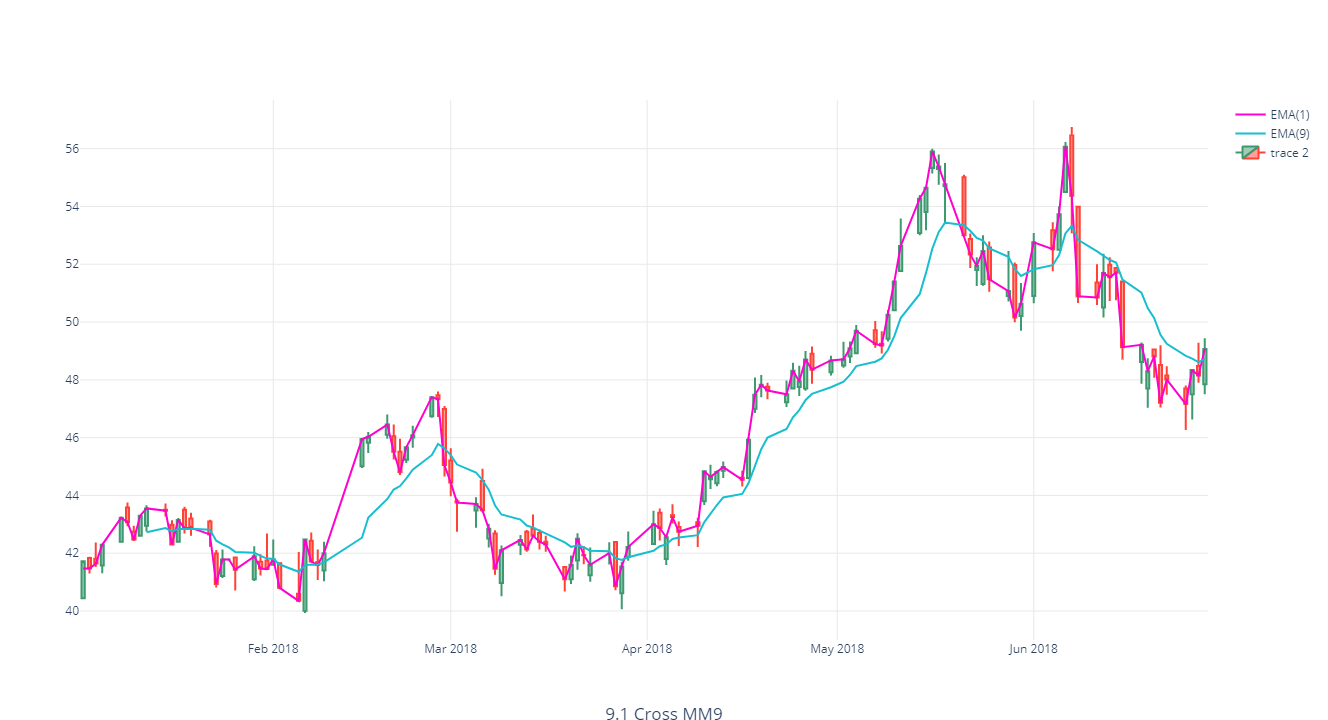

In [271]:
trace_short = go.Scatter(
                x=vale3.index,
                y=vale3.EMA1,
                name = "EMA(1)",
                line = dict(color = '#FF00CF'),
                opacity = 1)

trace_long = go.Scatter(
                x=vale3.index,
                y=vale3.EMA9,
                name = "EMA(9)",
                line = dict(color = '#17BECF'),
                opacity = 1)

trace_candles = go.Candlestick(x=vale3.index,
                    open=vale3.Open,
                    high=vale3.High,
                    low=vale3.Low,
                    close=vale3.Close)

data = [trace_short, trace_long, trace_candles]

simple_plot(data, '9.1 Cross MM9')

# Chapter 10 - ADX

In [272]:
tickers = ['VALE3.SA']

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2018, 12, 31)

data = get(tickers, start_date, end_date).loc['VALE3.SA'].dropna()


data_ant = data.shift(1)

# intermediate dataset, whose purpose is to find out the TR value
tr = pd.DataFrame([
        data.High - data.Low, 
        np.absolute(data.High - data_ant.Close), 
        np.absolute(data.Low - data_ant.Close)])

# to facilitate our calculation, we have to transpose the matrix, 
tr = tr.transpose()

# get the max value of each row
tr= tr.max(axis=1)

# assign TR to our dataset
data['tr'] = tr


# get +DM
dm_plus = np.where((data.High - data_ant.High) > (data_ant.Low - data.Low), 
                     (data.High - data_ant.High).apply(
                             lambda x: np.max([x, 0])),
                     0)

# get -DM
dm_minus = np.where((data_ant.Low - data.Low) > (data.High - data_ant.High), 
                     (data_ant.Low - data.Low).apply(
                             lambda x: np.max([x, 0])),
                     0)

# assign DM's to our dataset
data['dmPlus'] = dm_plus
data['dmMinus'] = dm_minus

# remove first line, becouse we won't use it
data = data[1:]

data.head()

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2018-01-03  41.880001  41.299999  41.830002  41.470001  12744200.0  38.826576   
2018-01-04  42.369999  41.520000  41.810001  41.639999  18433000.0  38.985741   
2018-01-05  42.290001  41.310001  41.570000  42.290001  15251300.0  39.594303   
2018-01-08  43.230000  42.400002  42.400002  43.230000  14542800.0  40.474384   
2018-01-09  43.750000  42.930000  43.580002  43.070000  15986200.0  40.324589   

                  tr    dmPlus   dmMinus  
Date                                      
2018-01-03  0.580002  0.139999  0.000000  
2018-01-04  0.899998  0.489998  0.000000  
2018-01-05  0.980000  0.000000  0.209999  
2018-01-08  0.939999  0.939999  0.000000  
2018-01-09  0.820000  0.520000  0.000000

In [273]:
window = 14

data['trAvg'] = np.NaN
data['dmPlusAvg'] = np.NaN
data['dmMinusAvg'] = np.NaN

# sum of 14 periodos for calcaulation of the tr, dmPlus and dmMinus
data.trAvg[window-1] = np.sum(data.iloc[0:window].tr)
data.dmPlusAvg[window-1] = np.sum(data.iloc[0:window].dmPlus)
data.dmMinusAvg[window-1] = np.sum(data.iloc[0:window].dmMinus)

# get data from 14th row until end of the dataset
for i in range(window, len(data)):
    data.trAvg[i] = data.trAvg[i-1] - (data.trAvg[i-1] / window) + data.tr[i]
    data.dmPlusAvg[i] = data.dmPlusAvg[i-1] - (data.dmPlusAvg[i-1] / window) + data.dmPlus[i]
    data.dmMinusAvg[i] = data.dmMinusAvg[i-1] - (data.dmMinusAvg[i-1] / window) + data.dmMinus[i]
    
data = data.dropna()
data.head()    

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2018-01-22  43.160000  42.220001  43.099998  42.650002  11580900.0  39.931362   
2018-01-23  42.110001  40.810001  41.990002  40.930000  22075600.0  38.320992   
2018-01-24  42.130001  41.139999  41.209999  41.779999  22096600.0  39.116810   
2018-01-25  41.779999  41.779999  41.779999  41.779999         0.0  39.116810   
2018-01-26  41.880001  40.709999  41.849998  41.430000  19259500.0  38.789124   

                  tr  dmPlus   dmMinus      trAvg  dmPlusAvg  dmMinusAvg  
Date                                                                      
2018-01-22  0.939999    0.00  0.379997  11.820004   3.329998    2.150002  
2018-01-23  1.840000    0.00  1.410000  12.815718   3.092141    3.406430  
2018-01-24  1.200001    0.02  0.000000  13.100310   2.891274    3.163113  
2018-01-25  0.000000    0.00  0.000000  12.164574   2.684755    2.937177  
2018-01-26  1.170002    0.00  1.070000  12.465677   2.492986    3.797378

In [274]:
# get DI's values
data['diPlus'] = (data.dmPlusAvg / data.trAvg) * 100
data['diMinus'] = (data.dmMinusAvg / data.trAvg) * 100

data.head()

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2018-01-22  43.160000  42.220001  43.099998  42.650002  11580900.0  39.931362   
2018-01-23  42.110001  40.810001  41.990002  40.930000  22075600.0  38.320992   
2018-01-24  42.130001  41.139999  41.209999  41.779999  22096600.0  39.116810   
2018-01-25  41.779999  41.779999  41.779999  41.779999         0.0  39.116810   
2018-01-26  41.880001  40.709999  41.849998  41.430000  19259500.0  38.789124   

                  tr  dmPlus   dmMinus      trAvg  dmPlusAvg  dmMinusAvg  \
Date                                                                       
2018-01-22  0.939999    0.00  0.379997  11.820004   3.329998    2.150002   
2018-01-23  1.840000    0.00  1.410000  12.815718   3.092141    3.406430   
2018-01-24  1.200001    0.02  0.000000  13.100310   2.891274    3.163113   
2018-01-25  0.000000    0.00  0.000000  12.164574   2.684755    2.937177   
2018-01-26  1.170002    0.00  1.070000  12.465677   2.492986    3.797378   

               diPlus    diMinus  
Date                              
2018-01-22  28.172564  18.189517  
2018-01-23  24.127724  26.580094  
2018-01-24  22.070273  24.145332  
2018-01-25  22.070273  24.145332  
2018-01-26  19.998805  30.462669

In [275]:
# get DX value
data['DX'] = (np.absolute(data.diPlus - data.diMinus) / (data.diPlus + data.diMinus)) * 100
data.head()

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2018-01-22  43.160000  42.220001  43.099998  42.650002  11580900.0  39.931362   
2018-01-23  42.110001  40.810001  41.990002  40.930000  22075600.0  38.320992   
2018-01-24  42.130001  41.139999  41.209999  41.779999  22096600.0  39.116810   
2018-01-25  41.779999  41.779999  41.779999  41.779999         0.0  39.116810   
2018-01-26  41.880001  40.709999  41.849998  41.430000  19259500.0  38.789124   

                  tr  dmPlus   dmMinus      trAvg  dmPlusAvg  dmMinusAvg  \
Date                                                                       
2018-01-22  0.939999    0.00  0.379997  11.820004   3.329998    2.150002   
2018-01-23  1.840000    0.00  1.410000  12.815718   3.092141    3.406430   
2018-01-24  1.200001    0.02  0.000000  13.100310   2.891274    3.163113   
2018-01-25  0.000000    0.00  0.000000  12.164574   2.684755    2.937177   
2018-01-26  1.170002    0.00  1.070000  12.465677   2.492986    3.797378   

               diPlus    diMinus         DX  
Date                                         
2018-01-22  28.172564  18.189517  21.532784  
2018-01-23  24.127724  26.580094   4.836276  
2018-01-24  22.070273  24.145332   4.489953  
2018-01-25  22.070273  24.145332   4.489953  
2018-01-26  19.998805  30.462669  20.736344

In [276]:
data['ADX'] = np.NaN

# average of 14 periods 
data.ADX[window-1] = data.DX[0:window].mean()

# get data from 14th row until end of the dataset
for i in range(window, len(data)):
    data.ADX[i] = (data.ADX[i-1] * (window - 1) + data.DX[i]) / window
    
data = data.dropna()
data.head()

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2018-02-08  42.130001  41.070000  41.689999  41.590000  18928800.0  38.938923   
2018-02-09  42.400002  41.029999  41.400002  42.000000  22760500.0  39.322792   
2018-02-15  45.959999  44.950001  45.009998  45.950001  31043100.0  43.021004   
2018-02-16  46.189999  45.470001  45.820000  46.029999  21107300.0  43.095905   
2018-02-19  46.799999  45.959999  46.099998  46.450001  12756100.0  43.489132   

                  tr    dmPlus   dmMinus      trAvg  dmPlusAvg  dmMinusAvg  \
Date                                                                         
2018-02-08  1.060001  0.000000  0.630001  15.328205   2.543004    3.524961   
2018-02-09  1.370003  0.270000  0.000000  15.603336   2.631361    3.273178   
2018-02-15  3.959999  3.559998  0.000000  18.448811   6.003405    3.039380   
2018-02-16  0.719997  0.230000  0.000000  17.851036   5.804590    2.822281   
2018-02-19  0.840000  0.610001  0.000000  17.415963   5.999977    2.620690   

               diPlus    diMinus         DX        ADX  
Date                                                    
2018-02-08  16.590358  22.996570  16.182643  10.812390  
2018-02-09  16.864095  20.977427  10.869890  10.816497  
2018-02-15  32.540875  16.474666  32.777786  12.385160  
2018-02-16  32.516821  15.810182  34.569986  13.969791  
2018-02-19  34.451019  15.047632  39.199831  15.771937

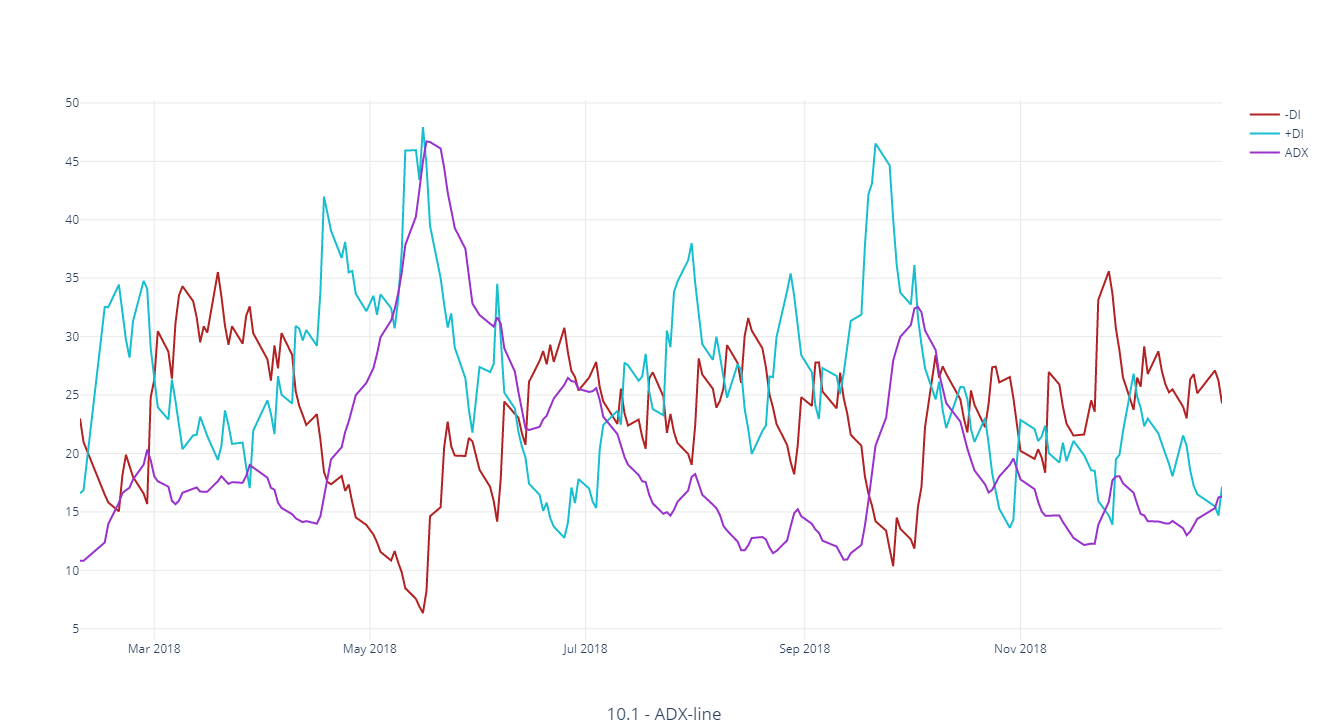

In [277]:
trace_candles = go.Candlestick(x=data.index,
                    name="VALE3.SA",
                    open=data.Open,
                    high=data.High,
                    low=data.Low,
                    close=data.Close)

trace_di_minus = go.Scatter(
                    x=data.index,
                    y=data.diMinus,
                    name = "-DI",
                    line = dict(color = '#B22222'),
                    opacity = 1)

trace_di_plus = go.Scatter(
                    x=data.index,
                    y=data.diPlus,
                    name = "+DI",
                    line = dict(color = '#17BECF'),
                    opacity = 1)

trace_adx = go.Scatter(
                    x=data.index,
                    y=data.ADX,
                    name = "ADX",
                    line = dict(color = '#9932CC'),
                    opacity = 1)

data=[trace_di_minus, trace_di_plus, trace_adx]

simple_plot(data, '10.1 - ADX-line')

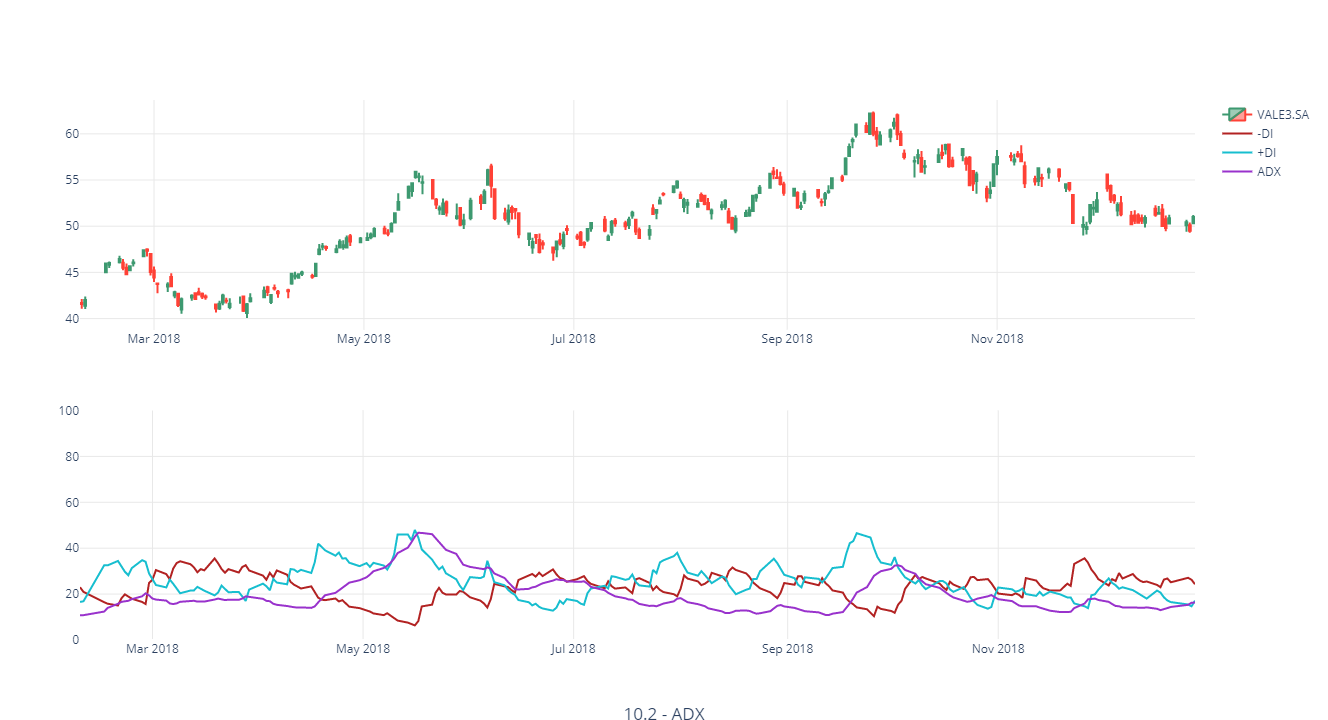

In [281]:
fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace_candles, 1, 1)
fig.append_trace(trace_di_minus, 2, 1)
fig.append_trace(trace_di_plus, 2, 1)
fig.append_trace(trace_adx, 2, 1)

fig['layout']['yaxis2'].update(range=[0, 100],
        showgrid=True,
        gridwidth=1,
        gridcolor='#E8E8E8')

fig['layout']['xaxis2'].update(
        showgrid=True,
        gridwidth=1,
        gridcolor='#E8E8E8')

simple_config_plot(fig, "10.2 - ADX")
fig.show()

# Chapter 11 - Backtest

In [282]:
from enum import Enum

class TradeType(Enum):
    NONE = 0
    LONG = 1
    SHORT  = -1

class BackTest:
    def __init__(self, stock, signals, **kwargs):
        self._position = 0
        self._position_opened = False
        self._amount = 0
        self._stock = stock
        self.trades = []
        self._signals = signals
        self._status = None
        self._std_qty_shares = 100
        self._reverse = True
        
        self._show_logs = ("log" in kwargs) and (kwargs["log"])
        
        self.win_trades = 0
        self.loss_trades = 0
        
        
    def _get_win_trades(self, x):
        return x >= 0 
    
    def _get_loss_trades(self, x):
        return x < 0
    
    def _trade(self, position, index):
        """        
        execute a trade
        :position : LONG or SHORT
        :index : index of stock list        
        """
        
        # if has a opened trading, then it will close the position
        if self._position_opened:   
            # set the operating profit
            profit = ((self._std_qty_shares * self._stock.Close[index]) - self._amount)  * (self._position * -1) 
            
            # add proft to trade list
            self.trades.append(profit)            
            
            # close position
            self._position_opened = False            
            
            # log            
            if self._show_logs:
                print(f'Opened[{self._amount}] -> Closed[{self._std_qty_shares * self._stock.Close[index]}] {position.name}')                             
        else:
            # If it hasn't an opened position, open it.
            self._position_opened = True
            self._amount = self._std_qty_shares * self._stock.Close[index]
    
    def start(self): 
        """
            execute the backtest
        """
        for index, item in self._stock.iterrows():
            
            # for long signal (buy)
            if TradeType(self._signals.signal[index]) == TradeType.LONG:
                # Was last signal long signal? go to next iteration
                if TradeType(self._position) == TradeType.LONG: continue

                self._position = self._signals.signal[index]                      
                #if it has a opened short position, then sell
                if self._position_opened:
                    self._trade(TradeType.SHORT, index)
                    # because I'm want to revert my position
                    if self._reverse:
                        self._trade(TradeType.LONG, index)
                else:
                    # ok, I need to open a position
                    self._trade(TradeType.LONG, index)

            # for short signal (sell)
            if TradeType(self._signals.signal[index]) == TradeType.SHORT:
                if TradeType(self._position) == TradeType.SHORT: continue

                self._position = self._signals.signal[index]       

                if self._position_opened:
                    self._trade(TradeType.LONG, index)
                    if self._reverse:
                        self._trade(TradeType.SHORT, index)
                else:
                    self._trade(TradeType.SHORT, index)

        self.win_trades = len(list(filter(self._get_win_trades, self.trades)))
        self.loss_trades = len(list(filter(self._get_loss_trades, self.trades)))

In [284]:
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2018, 12, 31)

all_data = get(['AAPL'], start_date, end_date)

aapl = all_data.loc['AAPL'].dropna()

def build_hilo_signal_list(window=5):
    aapl_high_avg = aapl.High.rolling(window=window).mean()
    aapl_low_avg = aapl.Low.rolling(window=window).mean()

    aapl_hilo = pd.DataFrame(index=aapl.index)
    aapl_hilo['high'] = np.where(aapl.Close > aapl_high_avg, 1, 0)
    aapl_hilo['low'] = np.where(aapl.Close < aapl_low_avg, 1, 0)
    aapl_hilo['signal'] = (aapl_hilo.high - aapl_hilo.low)
    
    return aapl_hilo

In [285]:
signals = build_hilo_signal_list(window=8)
bb = BackTest(aapl, signals, log=True)        
bb.start()
display(sum(bb.trades))

Opened[17527.999877929688] -> Closed[17422.000122070312] LONG
Opened[17422.000122070312] -> Closed[16433.999633789062] SHORT
Opened[16433.999633789062] -> Closed[17502.999877929688] LONG
Opened[17502.999877929688] -> Closed[17997.999572753906] SHORT
Opened[17997.999572753906] -> Closed[17530.00030517578] LONG
Opened[17530.00030517578] -> Closed[17161.000061035156] SHORT
Opened[17161.000061035156] -> Closed[17280.00030517578] LONG
Opened[17280.00030517578] -> Closed[16910.000610351562] SHORT
Opened[16910.000610351562] -> Closed[18630.999755859375] LONG
Opened[18630.999755859375] -> Closed[19024.000549316406] SHORT
Opened[19024.000549316406] -> Closed[19069.99969482422] LONG
Opened[19069.99969482422] -> Closed[18717.999267578125] SHORT
Opened[18717.999267578125] -> Closed[18991.000366210938] LONG
Opened[18991.000366210938] -> Closed[20150.0] SHORT
Opened[20150.0] -> Closed[22130.00030517578] LONG
Opened[22130.00030517578] -> Closed[22641.000366210938] SHORT
Opened[22641.000366210938] -> 

989.9993896484375

In [286]:
best_profit = None
print(f'BACKTEST HILO - Start Date: {signal_start_date} / End Date: {signal_end_date}')
print('-' * 100)

for window in range(2, 22):
    signals = build_hilo_signal_list(window=window)
    bb = BackTest(aapl, signals, log=False)        
    bb.start()
    
    profit = sum(bb.trades)
    
    if (best_profit is None) or (best_profit[1] < profit):
        best_profit = (window, profit)
    
    print(f'Profit for window={window}: {profit}')
    
print('-' * 100)    
print(f'Best Profit: window={best_profit[0]}: {best_profit[1]}')    

BACKTEST HILO - Start Date: 2018-01-01 / End Date: 2018-12-31
----------------------------------------------------------------------------------------------------
Profit for window=2: 1243.0038452148438
Profit for window=3: 405.00030517578125
Profit for window=4: 1092.999267578125
Profit for window=5: 6072.996520996094
Profit for window=6: 5559.996032714844
Profit for window=7: 4229.997253417969
Profit for window=8: 989.9993896484375
Profit for window=9: 2574.0036010742188
Profit for window=10: 1591.0003662109375
Profit for window=11: 727.9998779296875
Profit for window=12: -2371.0006713867188
Profit for window=13: -2291.0018920898438
Profit for window=14: -1723.0010986328125
Profit for window=15: -3179.998779296875
Profit for window=16: -2897.9995727539062
Profit for window=17: -3229.0008544921875
Profit for window=18: -1571.002197265625
Profit for window=19: -1926.0009765625
Profit for window=20: 15.00091552734375
Profit for window=21: -561.0000610351562
-----------------------------

In [287]:
def build_cross_avg_signal_list(short_window=5, long_window=9):
    aapl_short_avg = aapl.Close.rolling(window=short_window).mean()
    aapl_long_avg = aapl.Close.rolling(window=long_window).mean()

    aapl_cross_avg = pd.DataFrame(index=aapl.index)
    aapl_cross_avg['signal'] = np.where(aapl_short_avg > aapl_long_avg, 1, -1)
    
    return aapl_cross_avg

In [288]:
signals = build_cross_avg_signal_list(short_window=5, long_window=9)
bb = BackTest(aapl, signals, log=False)        
bb.start()
    
print(sum(bb.trades))
display(bb.win_trades)
display(bb.loss_trades)

1135.003662109375


10

14

In [289]:
best_profit = None
print(f'BACKTEST CROSS AVG - Start Date: {signal_start_date} / End Date: {signal_end_date}')
print('-' * 100)

for short_window in range(2, 22):
    for long_window in range(2, 22):
        signals = build_cross_avg_signal_list(short_window=short_window, long_window=long_window)
        bb = BackTest(aapl, signals, log=False)        
        bb.start()

        profit = sum(bb.trades)

        if (best_profit is None) or (best_profit[1] < profit):
            best_profit = ((short_window,long_window), profit)

        print(f'Profit for window={short_window}/{long_window}: {profit}')
    
print('-' * 100)    
print(f'Best Profit: window={best_profit[0]}: {best_profit[1]}')    

BACKTEST CROSS AVG - Start Date: 2018-01-01 / End Date: 2018-12-31
----------------------------------------------------------------------------------------------------
Profit for window=2/2: 0
Profit for window=2/3: -3558.013916015625
Profit for window=2/4: -1431.0104370117188
Profit for window=2/5: 1570.9915161132812
Profit for window=2/6: 3926.9943237304688
Profit for window=2/7: 3872.9934692382812
Profit for window=2/8: 3353.99169921875
Profit for window=2/9: 2715.997314453125
Profit for window=2/10: -1562.0010375976562
Profit for window=2/11: -1491.9998168945312
Profit for window=2/12: -2462.0010375976562
Profit for window=2/13: -5032.002258300781
Profit for window=2/14: -5168.0023193359375
Profit for window=2/15: -3648.0010986328125
Profit for window=2/16: -4242.0013427734375
Profit for window=2/17: -4652.001953125
Profit for window=2/18: -3788.0035400390625
Profit for window=2/19: -4310.003662109375
Profit for window=2/20: -3398.004150390625
Profit for window=2/21: -3430.00183105

In [290]:
buy = float(100 * aapl.head(1).Close)
sell = float(100 * aapl.tail(1).Close)

print(f'BACKTEST BUY AND HOLD - Start Date: {signal_start_date} / End Date: {signal_end_date}')
print('-' * 100)

print(f'Profit: {buy - sell}')

BACKTEST BUY AND HOLD - Start Date: 2018-01-01 / End Date: 2018-12-31
----------------------------------------------------------------------------------------------------
Profit: 1451.9989013671875


# Chapter 12 - ATR

## ATR

In [307]:
df = pd.DataFrame(data=dict(open=aapl.Open, high=aapl.High, low=aapl.Low, close=aapl.Close, close_prev=aapl.Close.shift(1)))
df['tr'] = df[['high','close_prev']].max(axis=1) - df[['low','close_prev']].min(axis=1)

atr_period = 21

first_atr = df.tr[:atr_period].sum() / atr_period

atr = first_atr
iter_count = 0
atr_list = []
for i, item in df.iterrows():
    if iter_count < atr_period -1:
        iter_count += 1
        atr_list.append(0)
        continue
    atr = (atr * (atr_period - 1) + item.tr) / atr_period
    atr_list.append(atr)
    
df['atr'] = atr_list

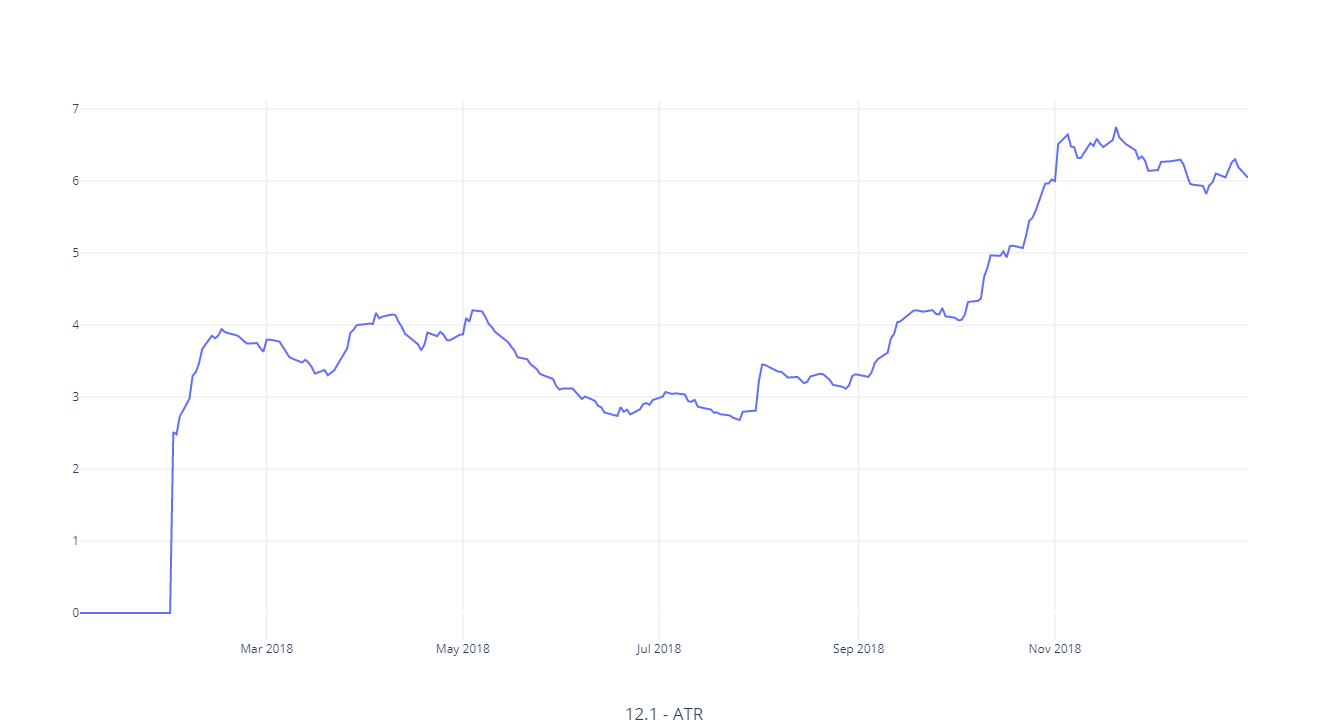

In [316]:
data = go.Scatter(
            x = df.index,
            y = df.atr,
            opacity = 1)
    
simple_plot(data, "12.1 - ATR")

## Stop ATR

In [319]:
factor = 2.7

down_trend_buffer = []
up_trend_buffer = []
iter_count = -1
for i, item in df.iterrows():    
    iter_count += 1
    
    if iter_count < atr_period:     
        down_trend_buffer.append(0)
        up_trend_buffer.append(0)        
        
        continue   
        
    elif iter_count == atr_period:

        down_trend_buffer.append(item.close + item.atr * factor)
        up_trend_buffer.append(item.close - item.atr * factor)
        
        continue
            
    pre_down_trend = item.close + item.atr * factor
    pre_up_trend = item.close - item.atr * factor
        
    if (item.close_prev > down_trend_buffer[iter_count-1]) and (down_trend_buffer[iter_count-1] > 0):        
        down_trend_buffer.append(0)
        up_trend_buffer.append(pre_up_trend)
    elif (item.close_prev < up_trend_buffer[iter_count-1]) and (up_trend_buffer[iter_count-1] > 0):
        down_trend_buffer.append(pre_down_trend)
        up_trend_buffer.append(0)        
    else:
        down_trend_buffer.append(0 if down_trend_buffer[iter_count-1] == 0 else min(pre_down_trend, down_trend_buffer[iter_count-1]))
        up_trend_buffer.append(0 if up_trend_buffer[iter_count-1] == 0 else max(pre_up_trend, up_trend_buffer[iter_count-1]))
    
    down_trend = pre_down_trend
    up_trend = pre_up_trend
    
df['down_trend'] = down_trend_buffer
df['up_trend'] = up_trend_buffer


df['down_trend'] = np.where(df.down_trend == 0, np.NaN, df.down_trend)
df['up_trend'] = np.where(df.up_trend == 0, np.NaN, df.up_trend)

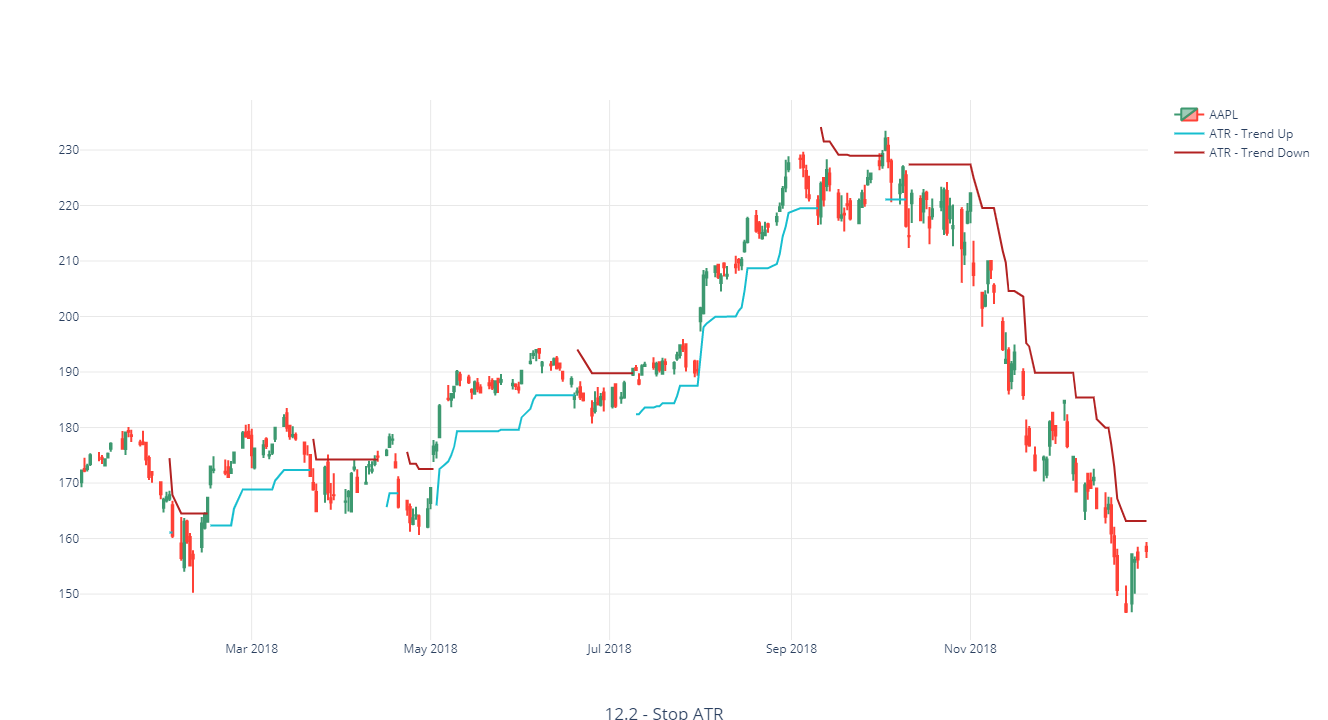

In [323]:
_data = df#['2020-01-01':]

trace_up_trend = go.Scatter(
                name="ATR - Trend Up",
                x=_data.index,
                y=_data.up_trend,
                line = dict(color = '#17BECF'),
                opacity = 1)

trace_down_trend = go.Scatter(
                name="ATR - Trend Down",
                x=_data.index,
                y=_data.down_trend,
                line = dict(color = '#B22222'),
                opacity = 1)


trace = go.Candlestick(
                name="AAPL",
                x=_data.index,
                open=_data.open,
                high=_data.high,
                low=_data.low,
                close=_data.close)

data=[trace, trace_up_trend, trace_down_trend]

simple_plot(data, "12.2 - Stop ATR")
                  
